# 1. Library import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Dataset Load

In [ ]:
data_path = '/content/drive/My Drive/Pokemon.csv'
original_data = pd.read_csv(data_path)
print(original_data.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [ ]:
pokemon = original_data.copy()   # baseline Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
print(pokemon.shape)
pokemon.head()

(800, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

Ï¥ù 800Í∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§.

In [ ]:
# Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3      154       90    130           1       True  
4      154      100    130           1       True

In [ ]:
# ÏùºÎ∞ò Ìè¨ÏºìÎ™¨ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

# 3. EDA

In [ ]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Type 1Îßå Í∞ÄÏßÄÍ≥† ÏûàÎäî Ìè¨ÏºìÎ™¨Îì§ÎèÑ ÏûàÏúºÎØÄÎ°ú Type 2Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎã§.

In [ ]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

|Ïª¨Îüº|
|-|
|#: Ìè¨ÏºìÎ™¨ Id number. ÏÑ±Î≥ÑÏù¥ Îã§Î•¥ÏßÄÎßå Í∞ôÏùÄ Ìè¨ÏºìÎ™¨Ïù∏ Í≤ΩÏö∞ Îì±ÏùÄ Í∞ôÏùÄ #Í∞íÏùÑ Í∞ÄÏßÑÎã§. int|
Name : Ìè¨ÏºìÎ™¨ Ïù¥Î¶Ñ. Ìè¨ÏºìÎ™¨ Í∞ÅÍ∞ÅÏùò Ïù¥Î¶ÑÏúºÎ°ú Ï†ÄÏû•ÎêòÍ≥†, 800Í∞úÏùò Ìè¨ÏºìÎ™¨Ïùò Ïù¥Î¶Ñ Îç∞Ïù¥ÌÑ∞Îäî Î™®Îëê Îã§Î•¥Îã§. (unique) str <br/>
Type 1 : Ï≤´ Î≤àÏß∏ ÏÜçÏÑ±. ÏÜçÏÑ±ÏùÑ ÌïòÎÇòÎßå Í∞ÄÏßÄÎäî Í≤ΩÏö∞ Type 1Ïóê ÏûÖÎ†•ÎêúÎã§. str <br/>
Type 2 : Îëê Î≤àÏß∏ ÏÜçÏÑ±. ÏÜçÏÑ±ÏùÑ ÌïòÎÇòÎßå Í∞ÄÏßÄÎäî Ìè¨ÏºìÎ™¨Ïùò Í≤ΩÏö∞ Type 2Îäî NaN(Í≤∞Ï∏°Í∞í)ÏùÑ Í∞ÄÏßÑÎã§. str <br/>
Total : Ï†ÑÏ≤¥ 6Í∞ÄÏßÄ Ïä§ÌÉØÏùò Ï¥ùÌï©. int <br/>
HP : Ìè¨ÏºìÎ™¨Ïùò Ï≤¥Î†•. int <br/>
Attack : Î¨ºÎ¶¨ Í≥µÍ≤©Î†•. (scratch, punch Îì±) int <br/>
Defense : Î¨ºÎ¶¨ Í≥µÍ≤©Ïóê ÎåÄÌïú Î∞©Ïñ¥Î†•. int <br/>
Sp. Atk : ÌäπÏàò Í≥µÍ≤©Î†•. (fire blast, bubble beam Îì±) int <br/>
Sp. Def : ÌäπÏàò Í≥µÍ≤©Ïóê ÎåÄÌïú Î∞©Ïñ¥Î†•. int <br/>
Speed : Ìè¨ÏºìÎ™¨ Îß§ÏπòÏóê ÎåÄÌï¥ Ïñ¥Îñ§ Ìè¨ÏºìÎ™¨Ïù¥ Î®ºÏ†Ä Í≥µÍ≤©Ìï†ÏßÄÎ•º Í≤∞Ï†ï. (Îçî ÎÜíÏùÄ Ìè¨ÏºìÎ™¨Ïù¥ Î®ºÏ†Ä Í≥µÍ≤©ÌïúÎã§) int <br/>
Generation : Ìè¨ÏºìÎ™¨Ïùò ÏÑ∏ÎåÄ. ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏóêÎäî 6ÏÑ∏ÎåÄÍπåÏßÄ ÏûàÎã§. int <br/>
Legendary : Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ Ïó¨Î∂Ä. !! Target feature !! bool <br/>

## 3.1 # : ID number

In [ ]:
# set : Ï§ëÎ≥µÏùÑ Ï†úÏô∏Ìïú unique ÏàòÎ•º count
len(set(pokemon["#"]))

721

## 3.2 Name : Ïù¥Î¶Ñ

In [ ]:
len(set(pokemon["Name"]))

800

Ïù¥Î¶ÑÏùÄ Îã§Î•¥ÏßÄÎßå Ìè¨ÏºìÎ™¨ Î≤àÌò∏Í∞Ä Í∞ôÏùÄ Í∞íÎì§Ïù¥ ÏûàÎã§.

## 3.3 Type 1 & Type 2 : Ìè¨ÏºìÎ™¨Ïùò ÏÜçÏÑ±

In [ ]:
# Í∞Å ÏÜçÏÑ±Ïùò Ï¢ÖÎ•ò(unique)Îäî Ï¥ù Î™á Í∞ÄÏßÄÏù∏ÏßÄ ÌôïÏù∏
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

Type 1ÏóêÎäî 18Í∞ú, Type 2ÏóêÎäî 19Í∞úÏùò ÏÜçÏÑ±Ïù¥ ÏûàÎã§.

In [ ]:
#Ï∞®ÏßëÌï©ÏúºÎ°ú Ï∞®Ïù¥ ÌôïÏù∏
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

Type2Îäî Type 1Ïù¥ Í∞ñÎäî ÏÜçÏÑ± Ïô∏ÏóêÎèÑ {nan} ÏÜçÏÑ±ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§.

In [ ]:
#Ìè¨ÏºìÎ™¨Îì§Ïùò Î™®Îì† TypeÏùÑ types Î≥ÄÏàòÏóê Ï†ÄÏû•
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Psychic', 'Dragon', 'Fire', 'Ice', 'Ghost', 'Poison', 'Bug', 'Grass', 'Normal', 'Rock', 'Dark', 'Electric', 'Fighting', 'Fairy', 'Steel', 'Flying', 'Water', 'Ground']


In [ ]:
# TypeÏùÑ ÌïòÎÇòÎßå Í∞ÄÏßÄÍ≥† ÏûàÎäî Ìè¨ÏºìÎ™¨ Ïàò ÌôïÏù∏
pokemon["Type 2"].isna().sum()

386

In [ ]:
# Type2Ïùò Í≤∞Ï∏°ÏπòÎ•º 'None'ÏúºÎ°ú ÎåÄÏ≤¥
pokemon["Type 2"].fillna('None').value_counts()

None        386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

### 3.3.1 Type 1 Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ plot

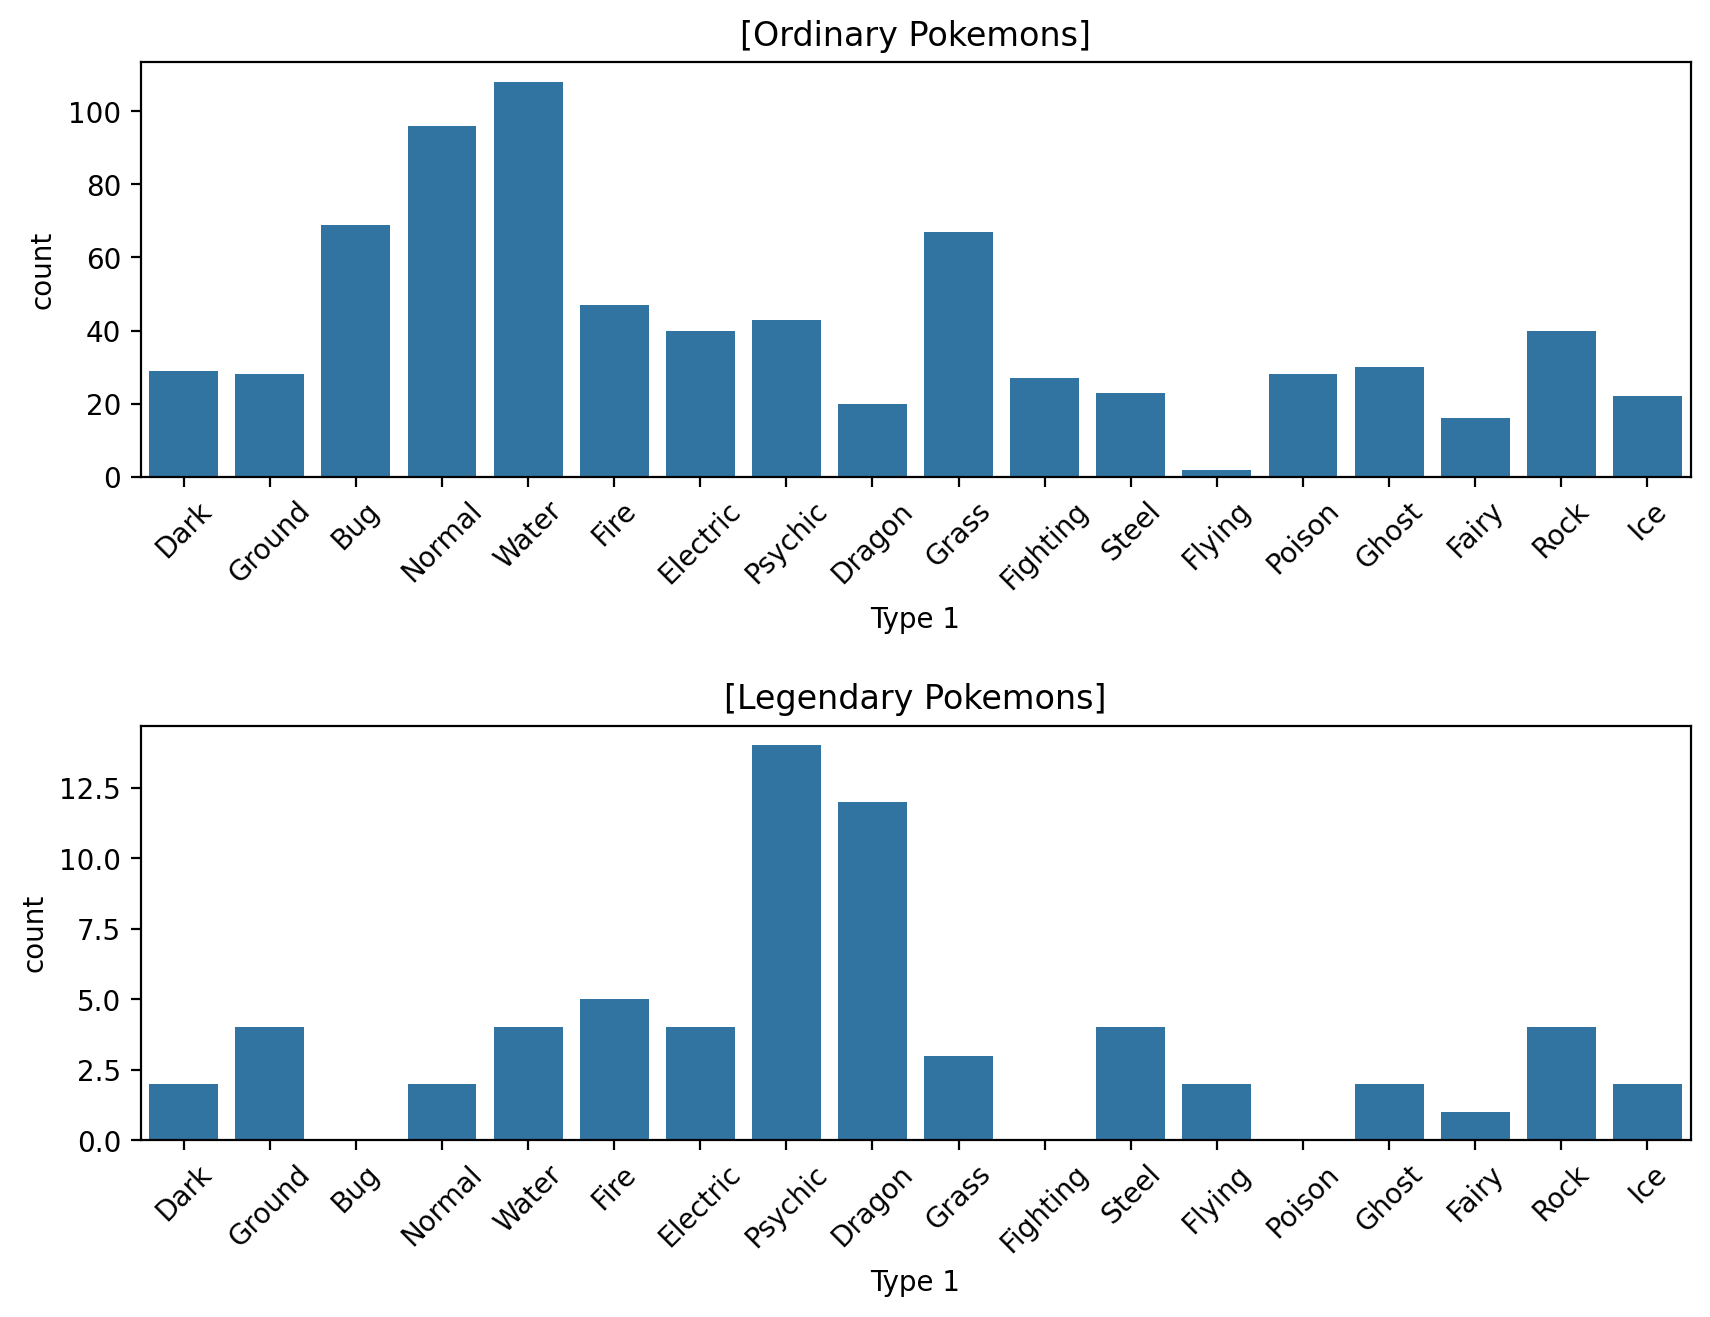

In [ ]:
#  Type 1 ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Í≥º Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ ÏÜçÏÑ± Î∂ÑÌè¨ ÌôïÏù∏
fig, ax = plt.subplots(2, 1, figsize = (10, 7))

sns.countplot(data=ordinary, x='Type 1', order = types, ax = ax[0])
ax[0].set_title('[Ordinary Pokemons]')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.countplot(data=legendary, x='Type 1', order = types, ax = ax[1])
ax[1].set_title('[Legendary Pokemons]')
ax[1].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace = 0.6)   # Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥ Ïó¨Î∞± Ï°∞Ï†ï
plt.show()

ÏùºÎ∞ò Ìè¨ÏºìÎ™¨ÏóêÎäî Normal, WaterÏùò ÏÜçÏÑ±Ïù¥ Í∞ÄÏû• ÎßéÏßÄÎßå, Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ÏóêÎäî Dragon, Psychic ÏÜçÏÑ±Ïù¥ Í∞ÄÏû• ÎßéÏùå

In [ ]:
# Type1Î≥ÑÎ°ú LegendaryÏùò ÎπÑÏú®ÏùÑ Î≥¥Ïó¨Ï£ºÎäî ÌîºÎ≤ó ÌÖåÏù¥Î∏î
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

Legendary
Type 1             
Flying     0.500000
Dragon     0.375000
Psychic    0.245614
Steel      0.148148
Ground     0.125000
Fire       0.096154
Electric   0.090909
Rock       0.090909
Ice        0.083333
Dark       0.064516
Ghost      0.062500
Fairy      0.058824
Grass      0.042857
Water      0.035714
Normal     0.020408
Poison     0.000000
Fighting   0.000000
Bug        0.000000

Legendary ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ ÏÜçÏÑ±ÏùÄ FlyingÏúºÎ°ú, 50%Ïùò ÎπÑÏú®ÏùÑ Í∞ÄÏßê.  
ÎÇ†ÏïÑÎã§ÎãàÎäî Ìè¨ÏºìÎ™¨ÏùÄ ÍΩ§ ÎÜíÏùÄ ÎπÑÏú®Î°ú Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïù¥Îã§.

### 3.3.2 Type 2 Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ plot

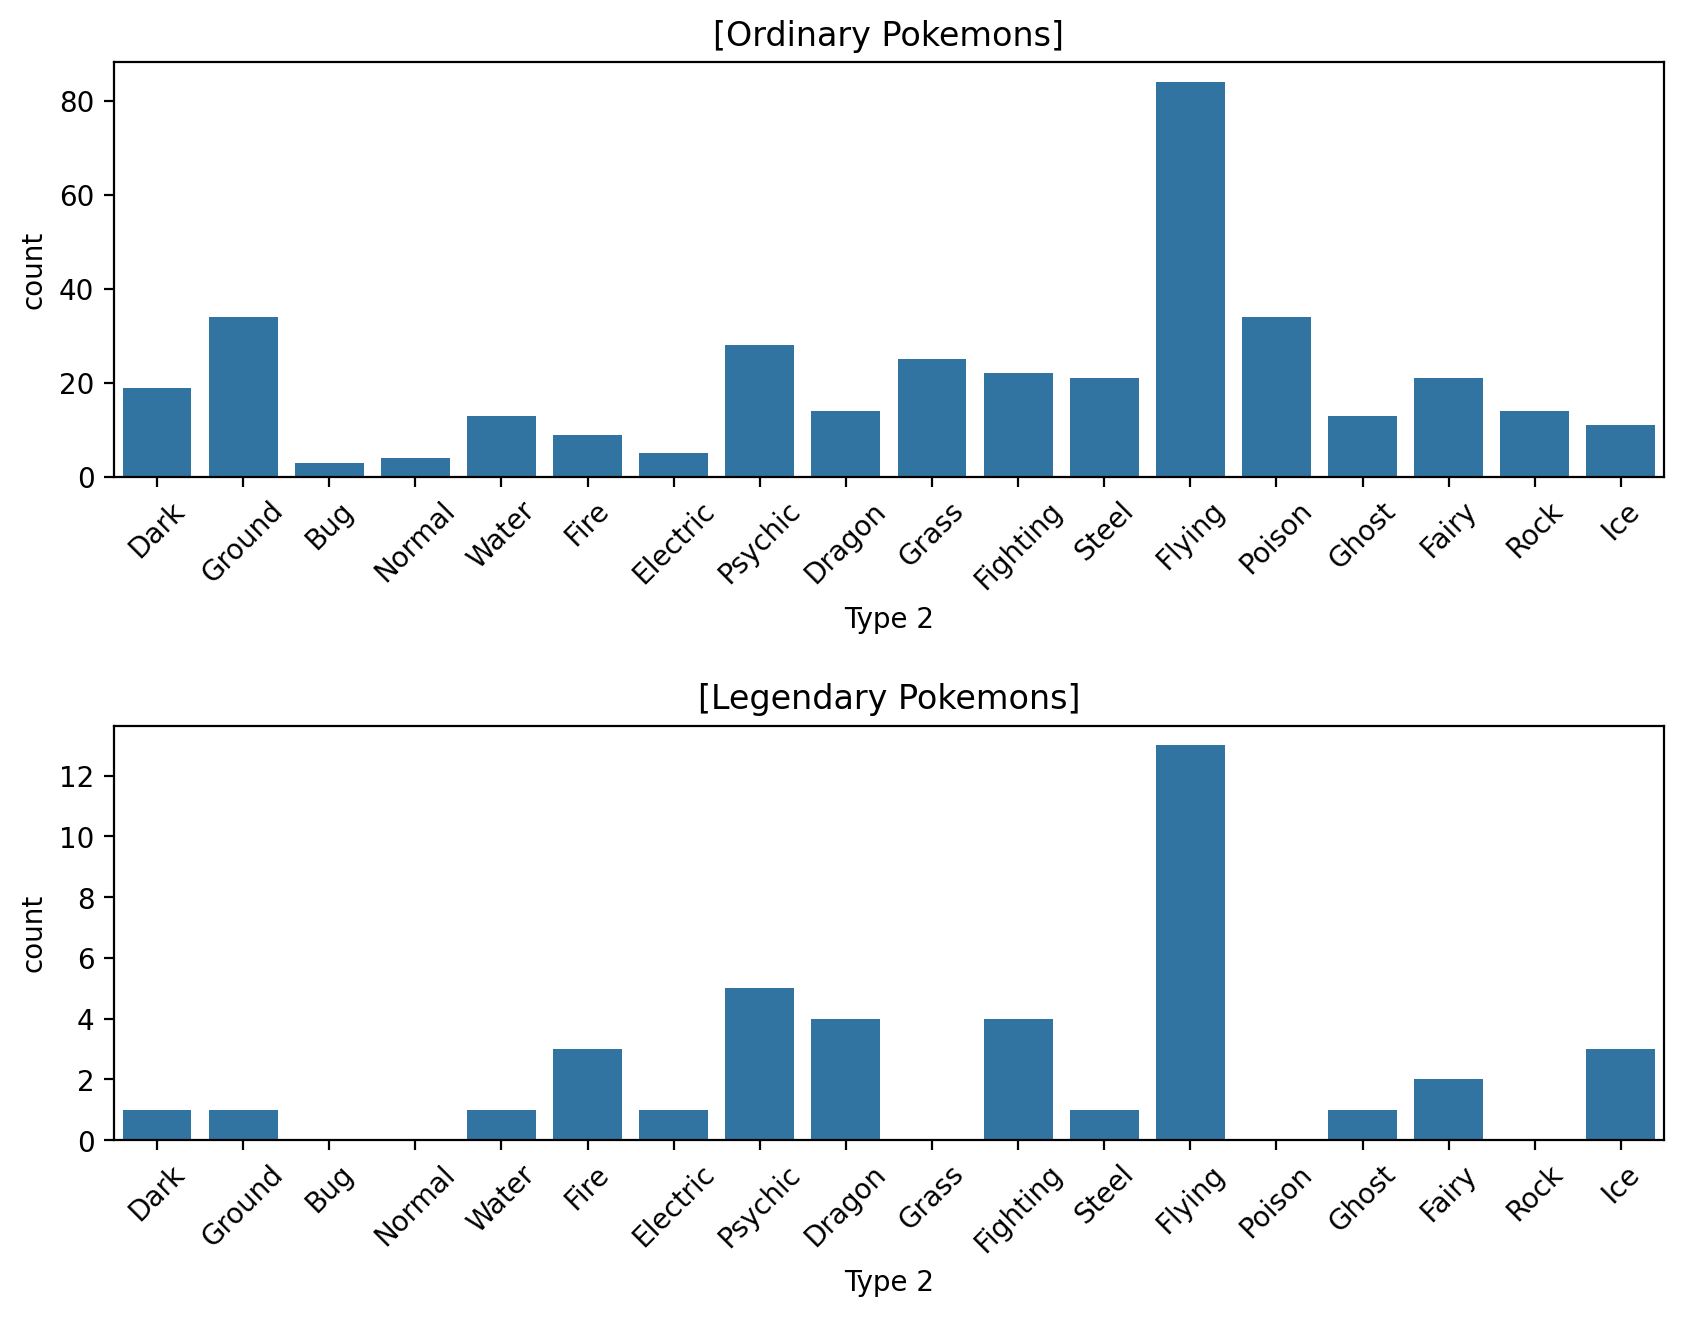

In [ ]:
# Type 2 ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Í≥º Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ ÏÜçÏÑ± Î∂ÑÌè¨ ÌôïÏù∏
fig, ax = plt.subplots(2, 1, figsize = (10, 7))

sns.countplot(data=ordinary, x='Type 2', order = types, ax = ax[0])
ax[0].set_title('[Ordinary Pokemons]')
ax[0].tick_params(axis = 'x', rotation = 45)

sns.countplot(data=legendary, x='Type 2', order = types, ax = ax[1])
ax[1].set_title('[Legendary Pokemons]')
ax[1].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace = 0.6)   # Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥ Ïó¨Î∞± Ï°∞Ï†ï
plt.show()

Flying ÏÜçÏÑ±Ïùò Í≤ΩÏö∞ Îëê Í≤ΩÏö∞ Îã§ Í∞ÄÏû• ÎßéÏßÄÎßå, ÏùºÎ∞ò Ìè¨ÏºìÎ™¨ÏóêÎäî Grass, Rock, PoisonÍ∞ôÏùÄ ÏÜçÏÑ±Ïù¥ ÎßéÏùÄ Î∞òÎ©¥ Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ÏùÄ ÌïòÎÇòÎèÑ ÏóÜÏùå

In [ ]:
# Type2Î≥ÑÎ°ú LegendaryÏùò ÎπÑÏú®ÏùÑ Î≥¥Ïó¨Ï£ºÎäî ÌîºÎ≤ó ÌÖåÏù¥Î∏î
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

Legendary
Type 2             
Fire       0.250000
Dragon     0.222222
Ice        0.214286
Electric   0.166667
Fighting   0.153846
Psychic    0.151515
Flying     0.134021
Fairy      0.086957
Water      0.071429
Ghost      0.071429
Dark       0.050000
Steel      0.045455
Ground     0.028571
Rock       0.000000
Bug        0.000000
Poison     0.000000
Normal     0.000000
Grass      0.000000

Type 2ÏóêÏÑúÎäî Fire ÏÜçÏÑ± Ìè¨ÏºìÎ™¨Ïùò Legendary ÎπÑÏú®Ïù¥ 25%Î°ú Í∞ÄÏû• ÎÜíÏùå

## 3.4 Total : Î™®Îì† Ïä§ÌÉØÏùò Ï¥ùÌï©

In [ ]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [ ]:
#Ï†ÑÏ≤¥ Ìè¨ÏºìÎ™¨Ïóê ÎåÄÌï¥ Total Í∞íÏù¥ statsÏùò Ï¥ùÌï©Í≥º Í∞ôÏùÄÏßÄ ÌôïÏù∏
pokemon['Total'].values.sum() == pokemon[stats].values.sum()

True

### 3.4.1 TotalÍ∞íÏóê Îî∞Î•∏ Î∂ÑÌè¨ plot

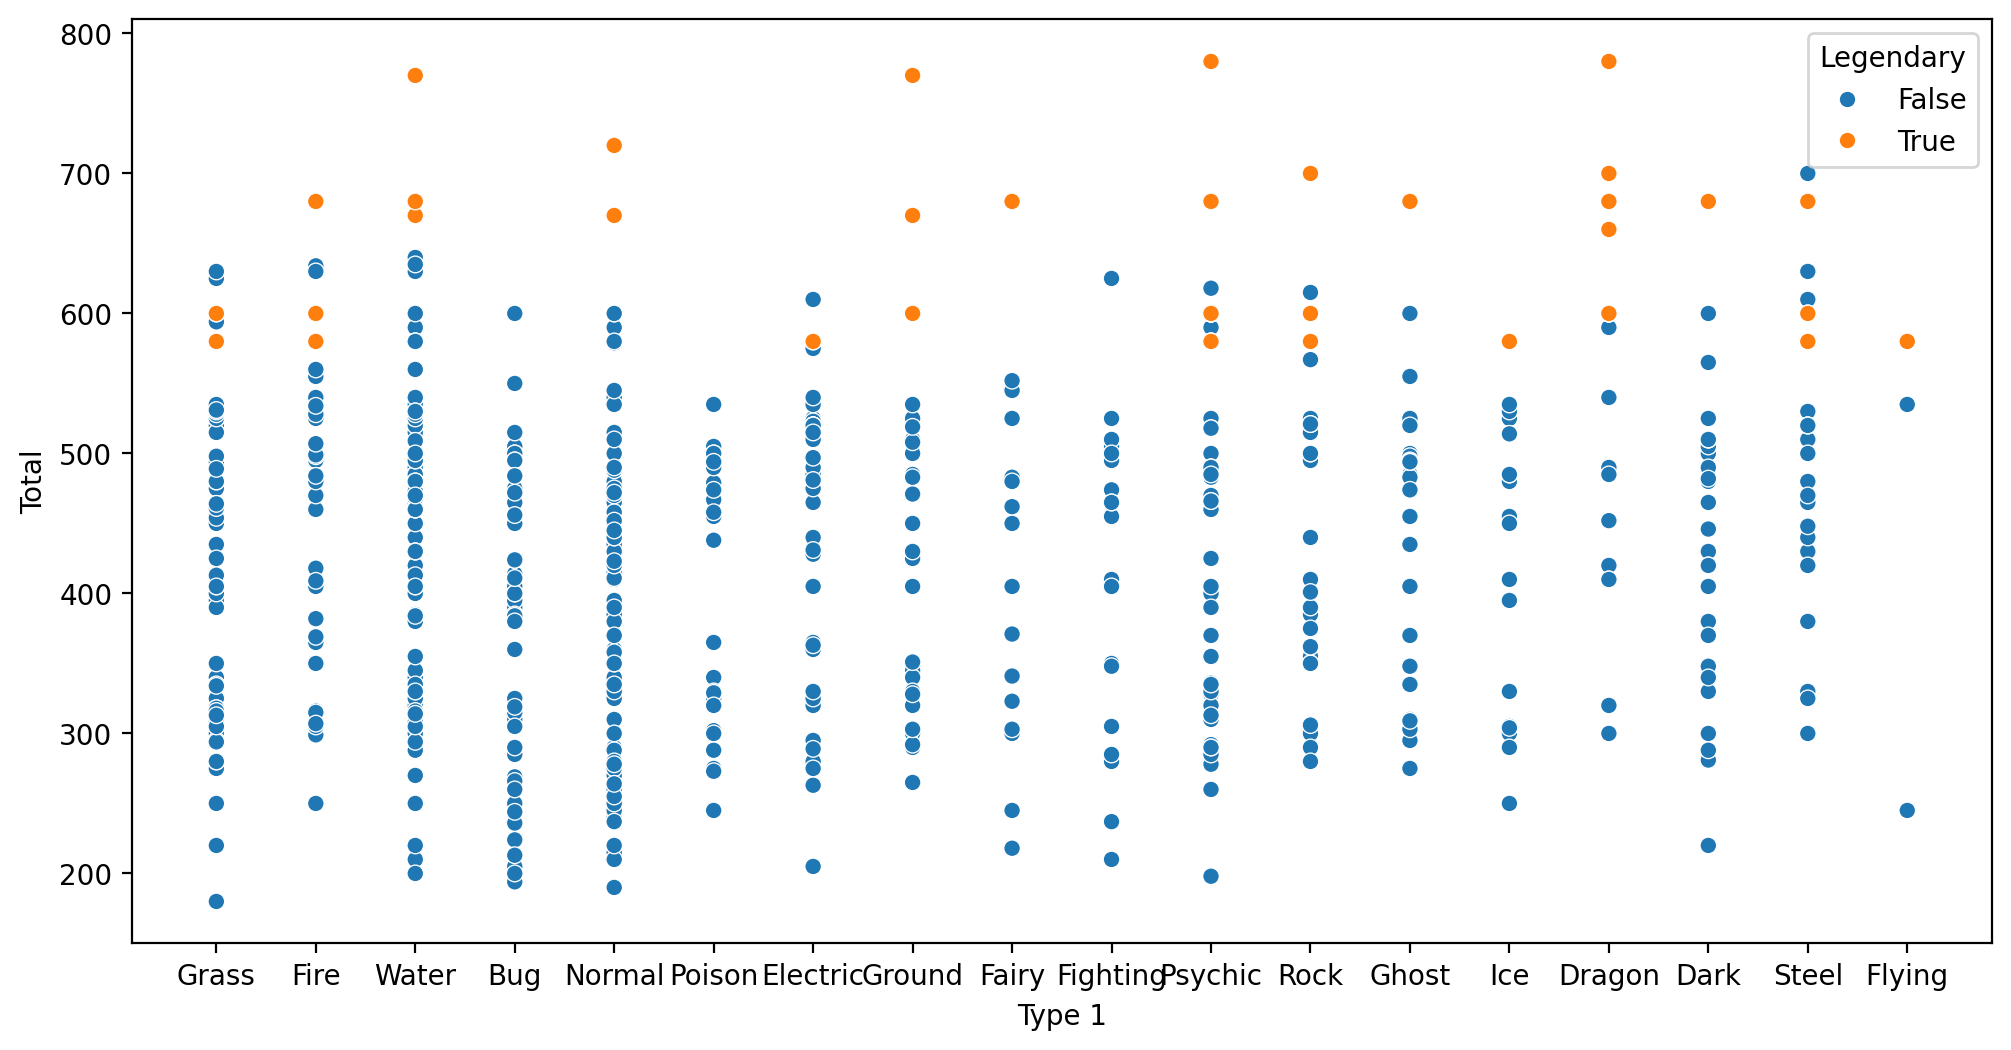

In [ ]:
#tatalÎ≥Ñ ÏùºÎ∞òÌè¨ÏºìÎ™¨Í≥º Ï†ÑÏÑ§Ìè¨ÏºìÎ™¨Ïùò Ï∞®Ïù¥ ÌôïÏù∏
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ÏùÄ Ï£ºÎ°ú Total Ïä§ÌÉØ Í∞íÏù¥ ÎÜíÎã§

## 3.5 ÏÑ∏Î∂ÄÏä§ÌÉØ: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

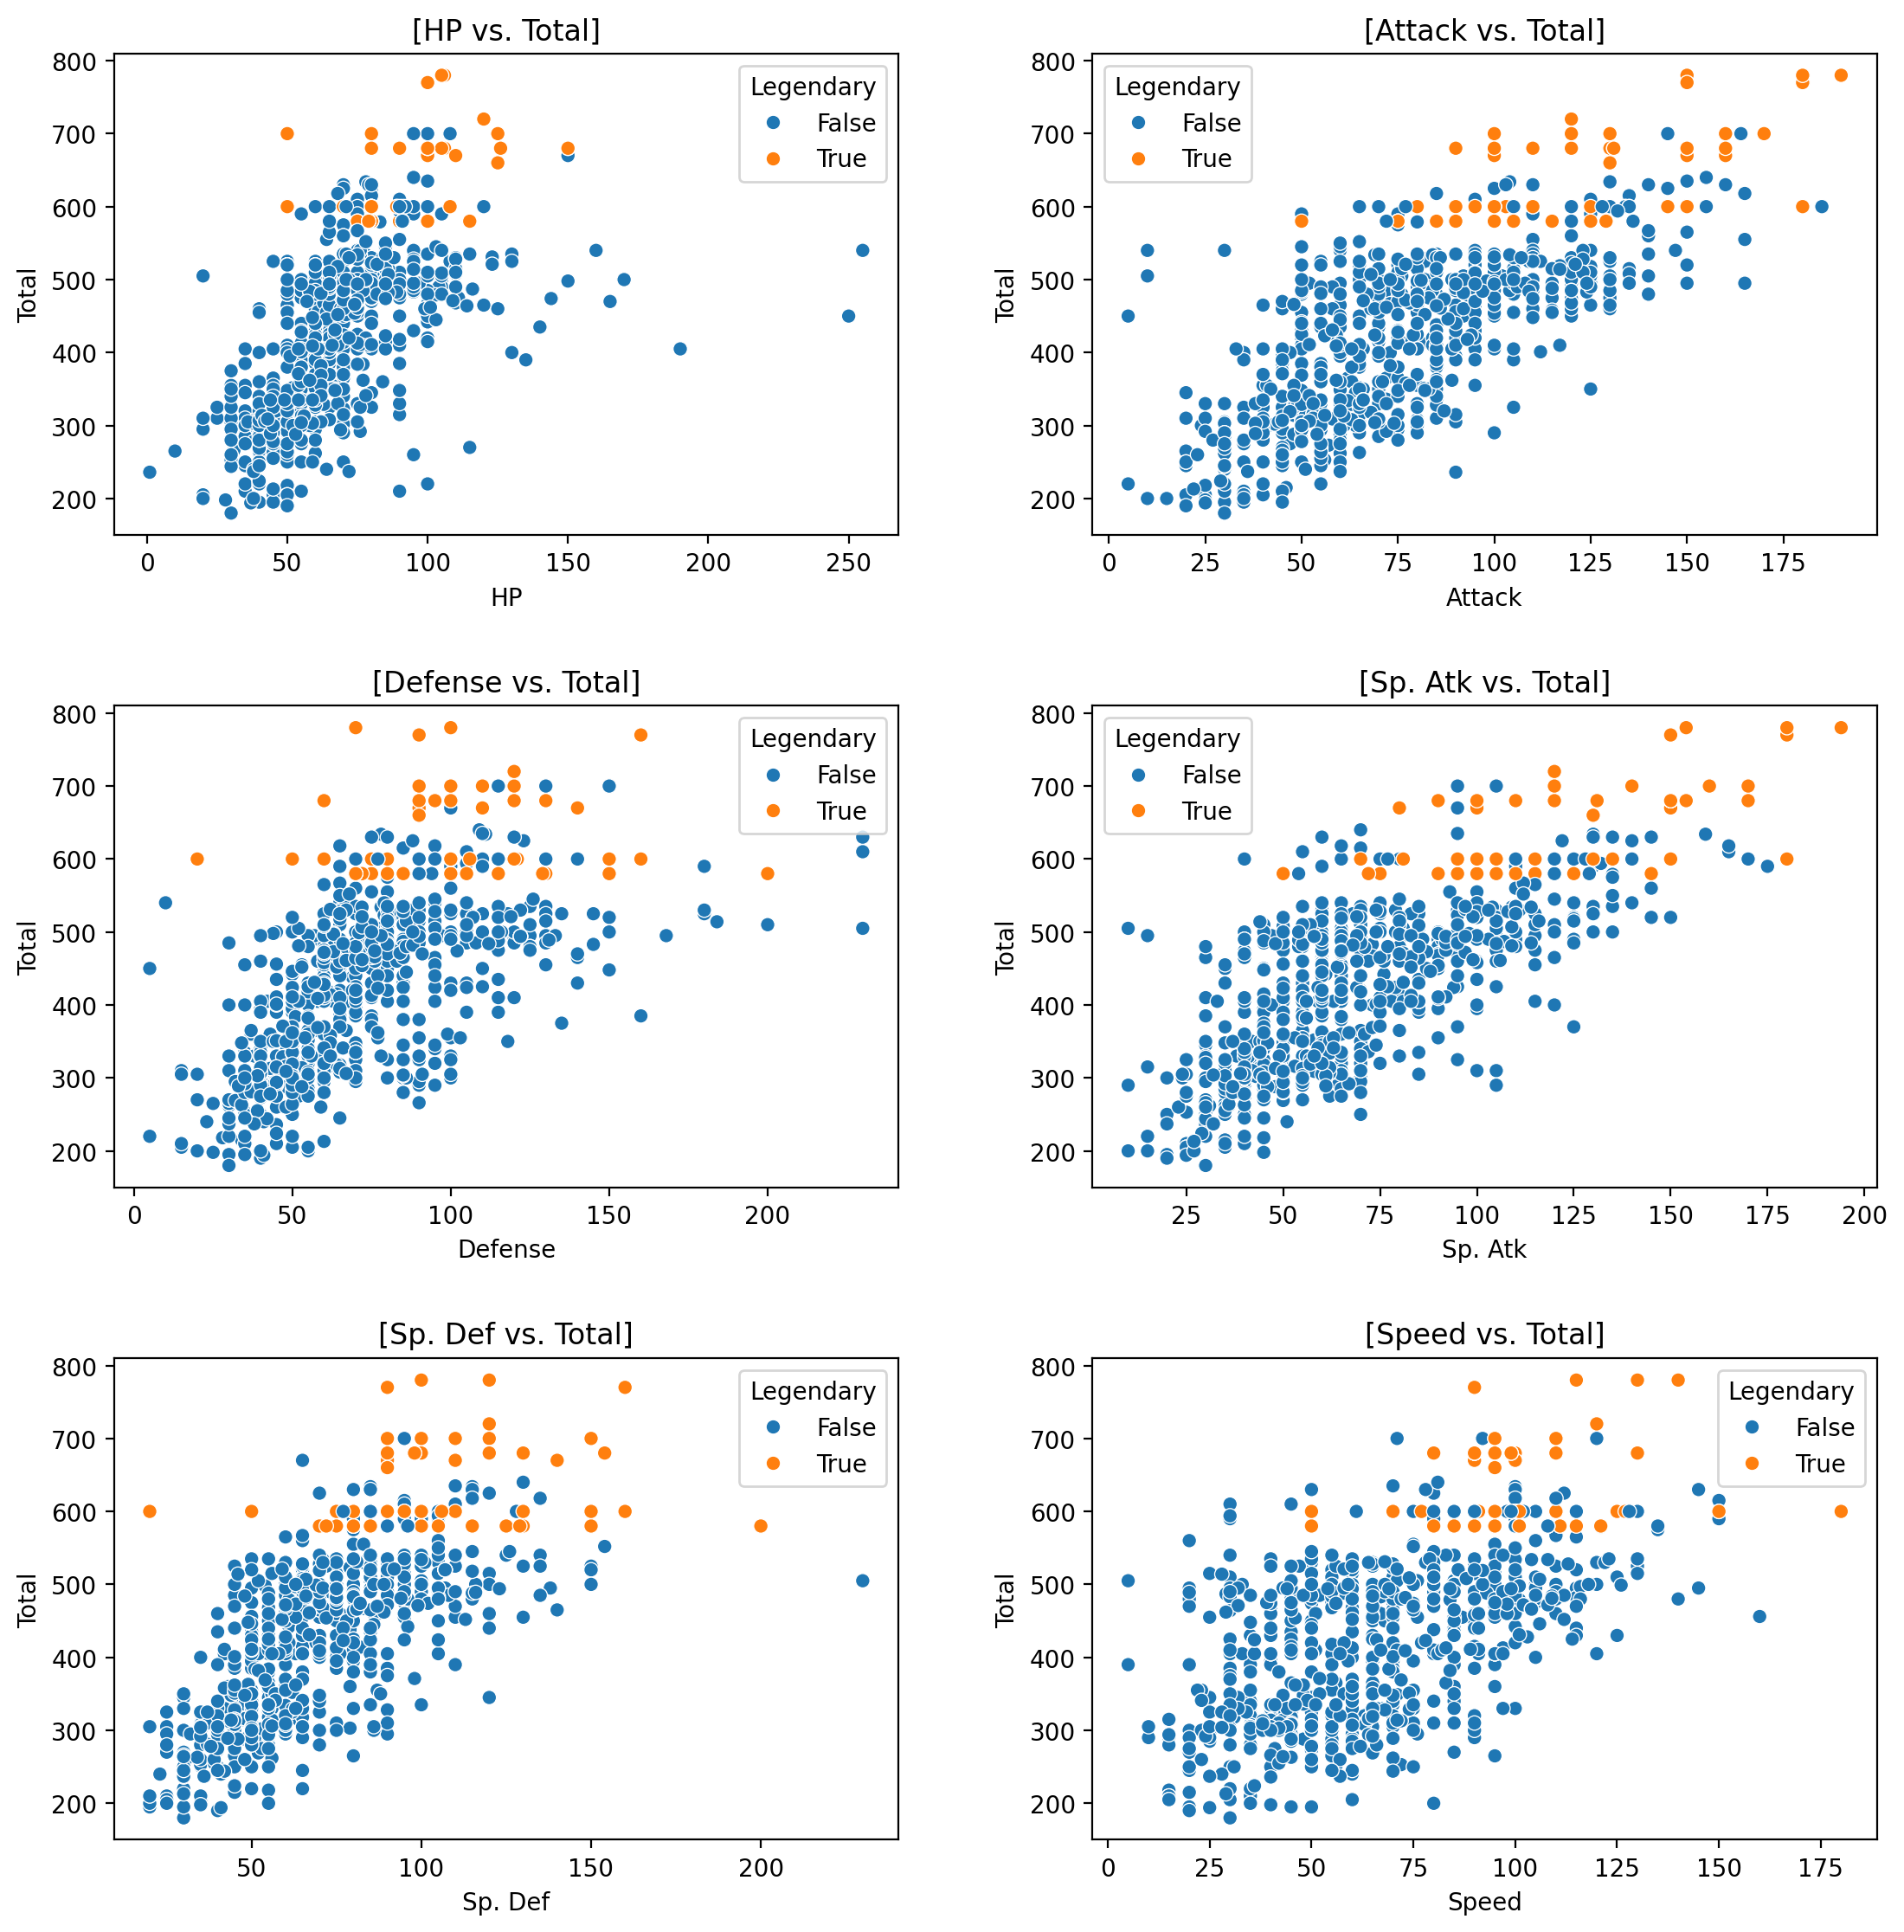

In [ ]:
# Í∞ÅÍ∞ÅÏùò Ïä§ÌÉØÏóê ÎåÄÌïú scatter plotÏùÑ 6Í∞úÏùò subplotÏúºÎ°ú ÌëúÌòÑ
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.tight_layout(pad=5.0)  # ÏÑúÎ∏åÌîåÎ°Ø Í∞ÑÏùò Í∞ÑÍ≤© Ï°∞Ï†ï

# stats Î¶¨Ïä§Ìä∏Î•º ÏàúÌöåÌïòÎ©∞ Í∞Å Ïä§ÌÉØÏóê ÎåÄÌïú scatter plot ÏÉùÏÑ±
for i, stat in enumerate(stats):
    row, col = divmod(i, 2)  # ÌñâÍ≥º Ïó¥ ÏúÑÏπò Í≥ÑÏÇ∞
    sns.scatterplot(data=pokemon, x=stat, y='Total', hue='Legendary', ax=axes[row, col])
    axes[row, col].set_title(f'[{stat} vs. Total]')
    axes[row, col].set_xlabel(stat)
    axes[row, col].set_ylabel('Total')

plt.show()

- HP, Defense, Sp. Def
    - Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ÏùÄ Ï£ºÎ°ú ÎÜíÏùÄ Ïä§ÌÉØÏùÑ Í∞ñÏßÄÎßå, Ïù¥ ÏÑ∏ Í∞ÄÏßÄÏóêÏÑúÎäî ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Ïù¥ Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Î≥¥Îã§ ÌäπÌûà ÎÜíÏùÄ Î™áÎ™á Ìè¨ÏºìÎ™¨Ïù¥ ÏûàÏäµÎãàÎã§.
    - Í∑∏Îü¨ÎÇò Í∑∏ Ìè¨ÏºìÎ™¨Îì§ÎèÑ Total Í∞íÏùÄ ÌäπÎ≥ÑÌûà ÎÜíÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ ÌäπÏ†ï Ïä§ÌÉØÎßå ÌäπÎ≥ÑÌûà ÎÜíÏùÄ, Ï¶â ÌäπÏ†ï ÏÜçÏÑ±Ïóê ÌäπÌôîÎêú Ìè¨ÏºìÎ™¨Îì§Î°ú Î≥¥ÏûÖÎãàÎã§. (ex. Î∞©Ïñ¥Ìòï, Í≥µÍ≤©Ìòï Îì±)

- Attack, Sp. Atk, Speed
    - Ïù¥ ÏÑ∏ Í∞ÄÏßÄ Ïä§ÌÉØÏùÄ TotalÍ≥º Í±∞Ïùò ÎπÑÎ°ÄÌï©ÎãàÎã§.
    - Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïù¥ Í∞Å Ïä§ÌÉØÏùò ÏµúÎåÄÏπòÎ•º Ï∞®ÏßÄÌïòÍ≥† ÏûàÏäµÎãàÎã§.

## 3.6 Generation : Ìè¨ÏºìÎ™¨Ïùò ÏÑ∏ÎåÄ


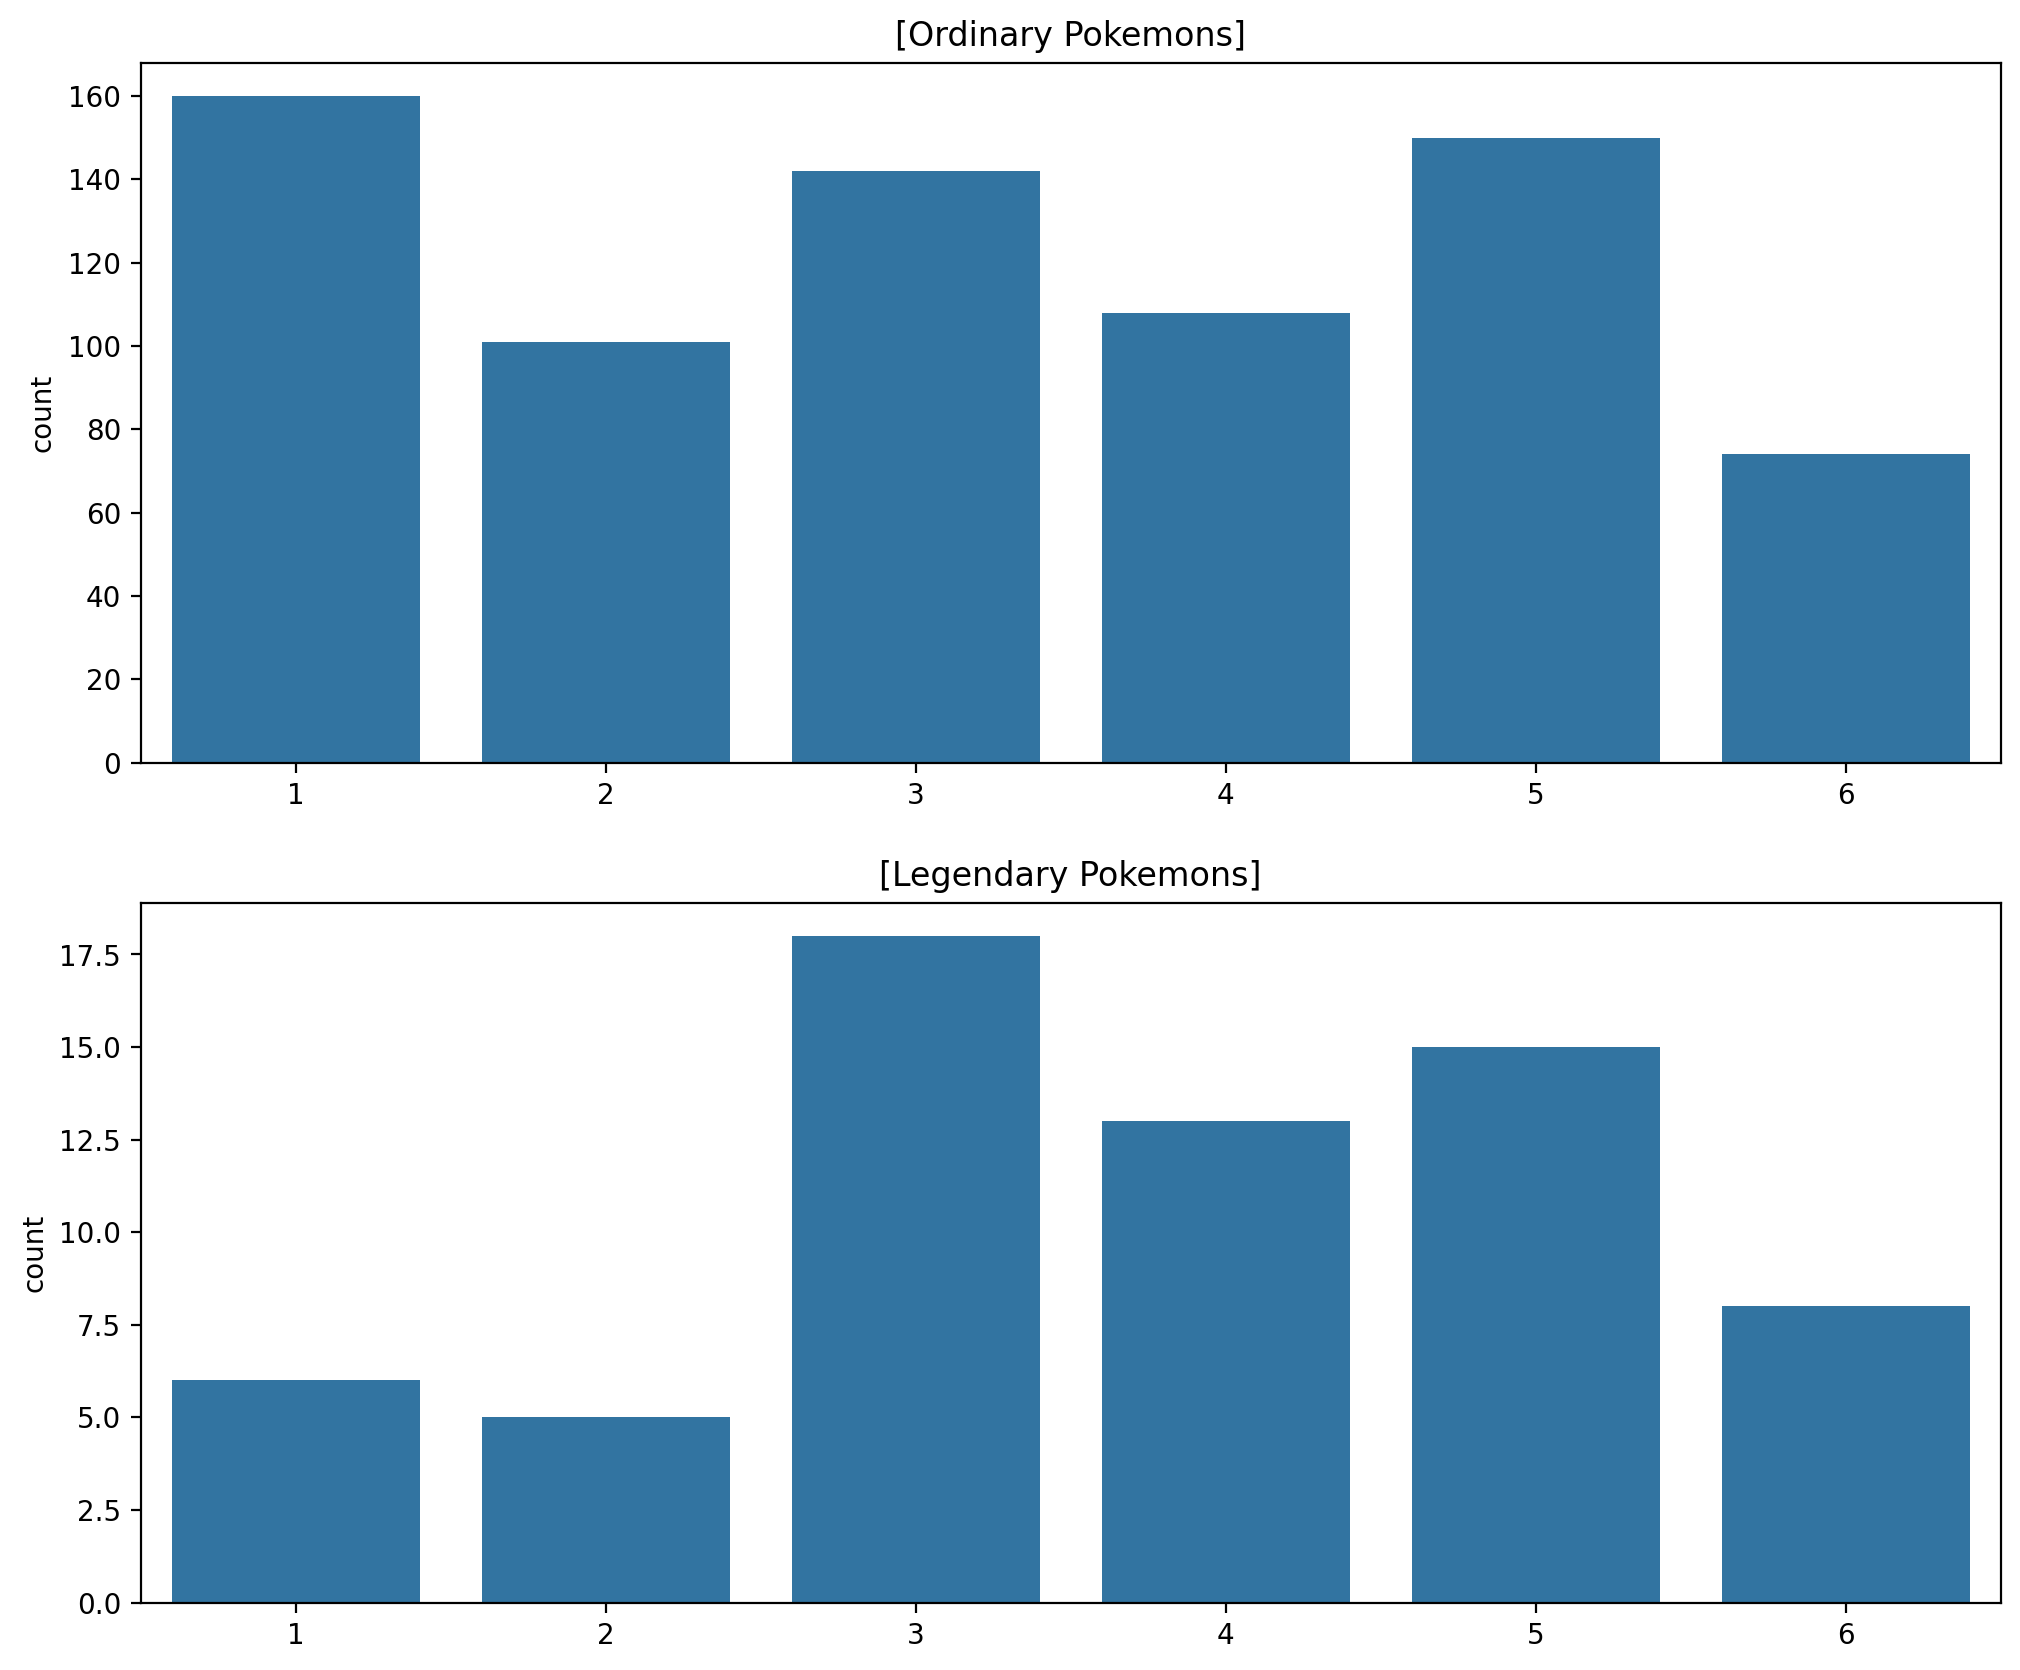

In [ ]:
# Generation Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ÏùÄ 1, 2ÏÑ∏ÎåÄÏóêÎäî ÎßéÏßÄ ÏïäÏïòÎÇò Î≥¥ÎÑ§Ïöî. 3ÏÑ∏ÎåÄÎ∂ÄÌÑ∞ ÎßéÏïÑÏ°åÎã§Í∞Ä, 6ÏÑ∏ÎåÄÏóê Îã§Ïãú Ï§ÑÏñ¥Îì† Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 3.7 Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïùò Total Í∞í

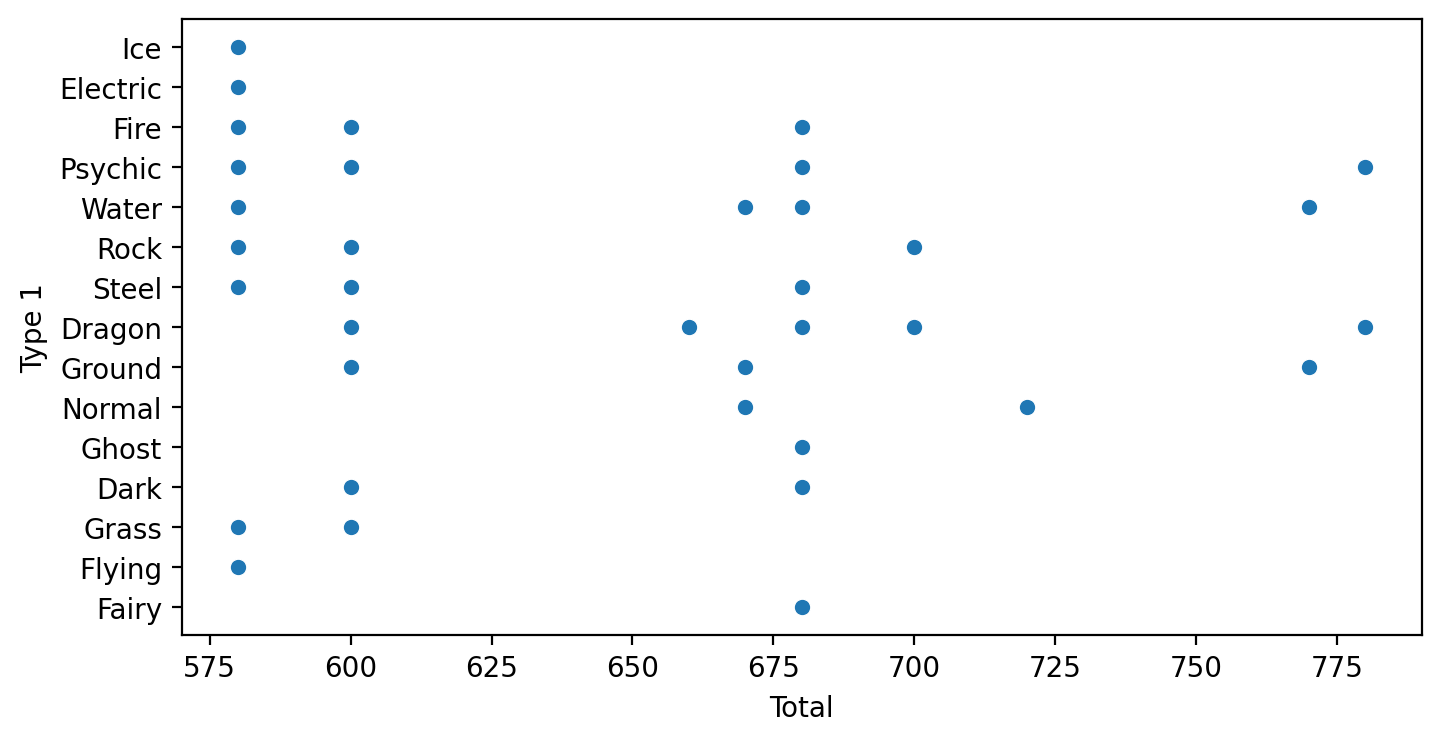

In [ ]:
#  Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Îì§Ïùò Total Í∞íÏùÑ ÏÜçÏÑ±(Type 1)Î≥ÑÎ°ú ÌôïÏù∏
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [ ]:
#Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïù¥ Í∞ÄÏßÄÎäî TotalÍ∞íÎì§Ïùò ÏßëÌï©
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ Í∞úÏ≤¥ÏàòÎäî ÎßéÏßÄÎßå unique totalÍ∞íÏùÄ 9Í∞úÏóê Î™∞Î†§ÏûàÏùå

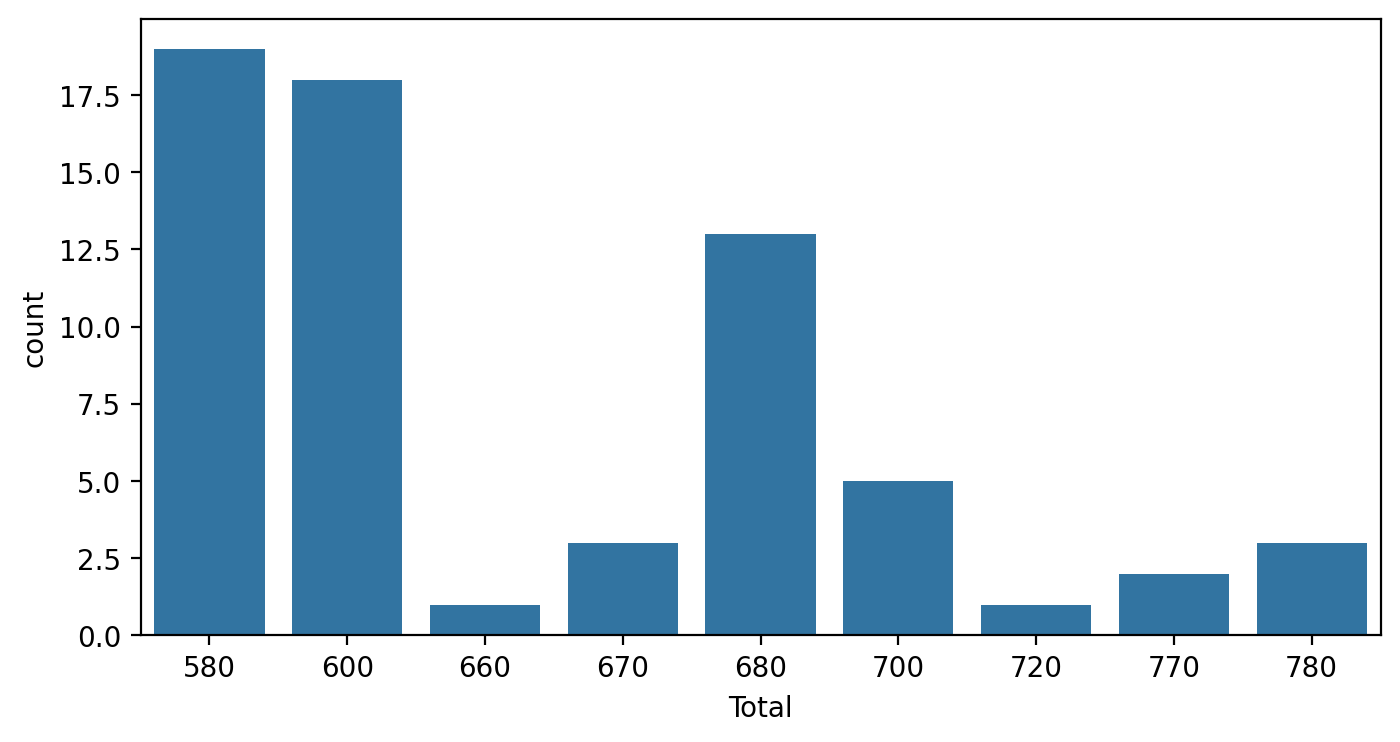

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [ ]:
round(65 / 9, 2)

7.22

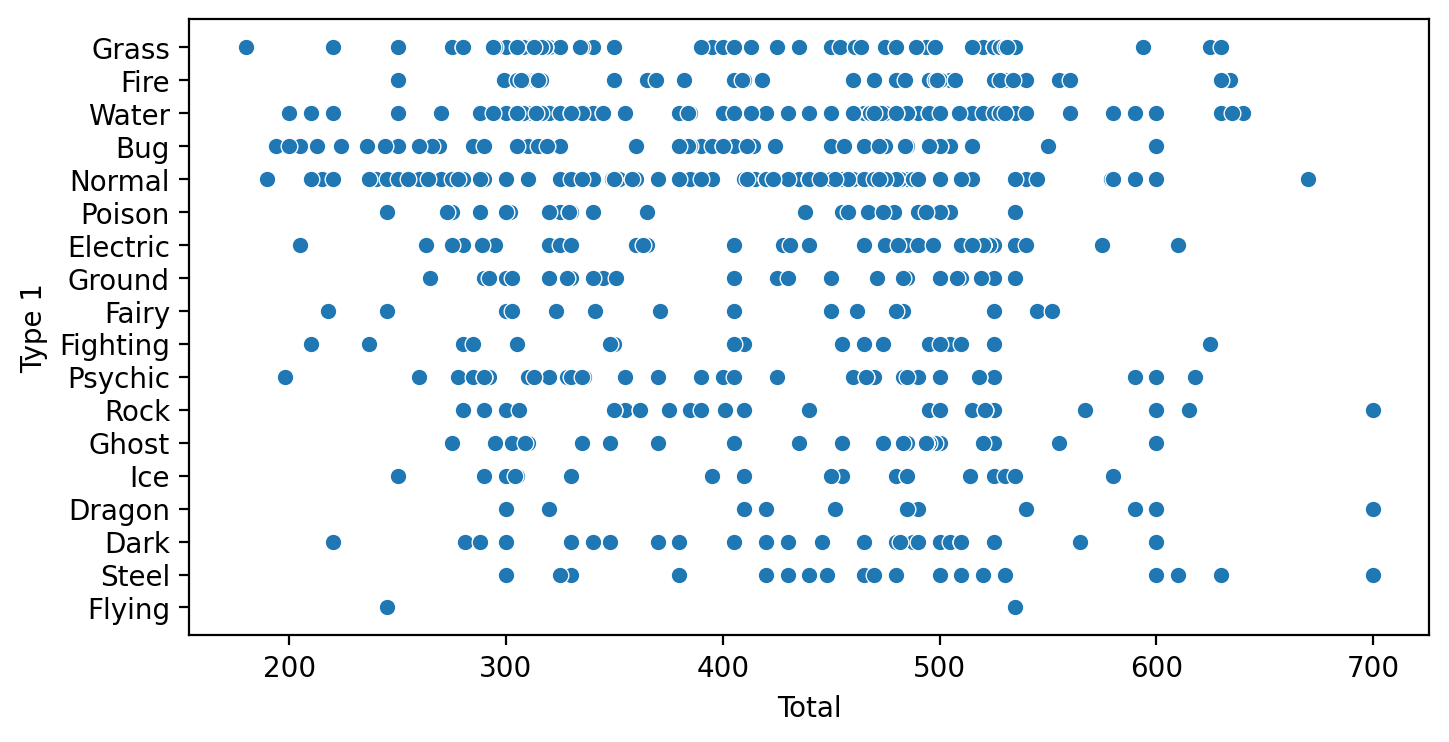

In [ ]:
#  ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Îì§Ïùò Total Í∞íÏùÑ ÏÜçÏÑ±(Type 1)Î≥ÑÎ°ú ÌôïÏù∏
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

In [ ]:
#ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Ïù¥ Í∞ÄÏßÄÎäî TotalÍ∞íÎì§Ïùò ÏßëÌï©
print(len(sorted(list(set(ordinary["Total"])))))

195


ÏùºÎ∞ò Ìè¨ÏºìÎ™¨ÏùÄ Ï¥ù 195Í∞ÄÏßÄÏùò Total ÏÜçÏÑ±Í∞íÏùÑ Í∞ÄÏßÄÍ≥†, Ï†ÑÏ≤¥ ÏùºÎ∞ò Ìè¨ÏºìÎ™¨ÏùÄ (800 - 65), Ï¶â 735ÎßàÎ¶¨Ïù¥ÎØÄÎ°ú,

In [ ]:
round(735 / 195, 2)

3.77

ÏïΩ 3.77ÎßàÎ¶¨Îßå Í∞ôÏùÄ Total Ïä§ÌÉØ Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏùå <br/>
ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Î≥¥Îã§ Ï†ÑÏÑ§ Ìè¨ÏºìÎ™¨ÏùÄ totalÍ∞íÏù¥ Îã§ÏñëÌïòÏßÄ ÏïäÏùåÏúºÎ°ú totalÍ∞íÏù¥ ÏòàÏ∏°ÌïòÎäîÎç∞ Ï§ëÏöî ÏöîÏÜåÎ°ú Î≥¥Ïó¨Ïßê

# 4. Feature Engineering
## 4.1 Name

In [ ]:
# Ïù¥Î¶Ñ Î≥Ñ ÌäπÏ†ïÎã®Ïñ¥Î°ú Î∂ÑÎ•ò
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

#                      Name    Type 1    Type 2  Total   HP  Attack  \
0   150                    Mewtwo   Psychic       NaN    680  106     110   
1   150       MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190   
2   150       MewtwoMega Mewtwo Y   Psychic       NaN    780  106     150   
3   380                    Latias    Dragon   Psychic    600   80      80   
4   380         LatiasMega Latias    Dragon   Psychic    700   80     100   
5   381                    Latios    Dragon   Psychic    600   80      90   
6   381         LatiosMega Latios    Dragon   Psychic    700   80     130   
7   382                    Kyogre     Water       NaN    670  100     100   
8   382       KyogrePrimal Kyogre     Water       NaN    770  100     150   
9   383                   Groudon    Ground       NaN    670  100     150   
10  383     GroudonPrimal Groudon    Ground      Fire    770  100     180   
11  384                  Rayquaza    Dragon    Flying    680  105     150   
12  384     RayquazaMega Rayquaza    Dragon    Flying    780  105     180   
13  386        DeoxysNormal Forme   Psychic       NaN    600   50     150   
14  386        DeoxysAttack Forme   Psychic       NaN    600   50     180   
15  386       DeoxysDefense Forme   Psychic       NaN    600   50      70   
16  386         DeoxysSpeed Forme   Psychic       NaN    600   50      95   
17  641   TornadusIncarnate Forme    Flying       NaN    580   79     115   
18  641     TornadusTherian Forme    Flying       NaN    580   79     100   
19  642  ThundurusIncarnate Forme  Electric    Flying    580   79     115   
20  642    ThundurusTherian Forme  Electric    Flying    580   79     105   
21  645   LandorusIncarnate Forme    Ground    Flying    600   89     125   
22  645     LandorusTherian Forme    Ground    Flying    600   89     145   
23  646                    Kyurem    Dragon       Ice    660  125     130   
24  646        KyuremBlack Kyurem    Dragon       Ice    700  125     170   
25  646        KyuremWhite Kyurem    Dragon       Ice    700  125     120   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        90      154       90    130           1       True  
1       100      154      100    130           1       True  
2        70      194      120    140           1       True  
3        90      110      130    110           3       True  
4       120      140      150    110           3       True  
5        80      130      110    110           3       True  
6       100      160      120    110           3       True  
7        90      150      140     90           3       True  
8        90      180      160     90           3       True  
9       140      100       90     90           3       True  
10      160      150       90     90           3       True  
11       90      150       90     95           3       True  
12      100      180      100    115           3       True  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17       70      125       80    111           5       True  
18       80      110       90    121           5       True  
19       70      125       80    111           5       True  
20       70      145       80    101           5       True  
21       90      115       80    101           5       True  
22       90      105       80     91           5       True  
23       90      130       90     95           5       True  
24      100      120       90     95           5       True  
25       90      170      100     95           5       True

Ïù¥Î¶ÑÏùÄ Î™®Îì† Ìè¨ÏºìÎ™¨Ïù¥ Í∞ÅÍ∞Å Îã§Î•∏ Ïú†ÏùºÌïú(unique) Í∞íÎì§Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Í≤ÉÏùÑ ÌôïÏù∏ÌñàÏóàÎäîÎç∞, Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ ÏÇ¨Ïù¥ÏóêÏÑúÎäî ÎπÑÏä∑Ìïú Ïù¥Î¶ÑÏù¥ Îã§Ïàò Ï°¥Ïû¨

In [ ]:
formes = names[13:23]
formes

#                      Name    Type 1  Type 2  Total  HP  Attack  \
13  386        DeoxysNormal Forme   Psychic     NaN    600  50     150   
14  386        DeoxysAttack Forme   Psychic     NaN    600  50     180   
15  386       DeoxysDefense Forme   Psychic     NaN    600  50      70   
16  386         DeoxysSpeed Forme   Psychic     NaN    600  50      95   
17  641   TornadusIncarnate Forme    Flying     NaN    580  79     115   
18  641     TornadusTherian Forme    Flying     NaN    580  79     100   
19  642  ThundurusIncarnate Forme  Electric  Flying    580  79     115   
20  642    ThundurusTherian Forme  Electric  Flying    580  79     105   
21  645   LandorusIncarnate Forme    Ground  Flying    600  89     125   
22  645     LandorusTherian Forme    Ground  Flying    600  89     145   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17       70      125       80    111           5       True  
18       80      110       90    121           5       True  
19       70      125       80    111           5       True  
20       70      145       80    101           5       True  
21       90      115       80    101           5       True  
22       90      105       80     91           5       True

In [ ]:
# Ï†ÑÏÑ§ Ìè¨ÏºìÎ™¨ Ïù¥Î¶Ñ Í∏∏Ïù¥Î°ú Ï∞®Ïù¥ ÌôïÏù∏
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       95      125     85           1       True           8  
1      125       90    100           1       True           6  
2      125       85     90           1       True           7  
3      154       90    130           1       True           6  
4      154      100    130           1       True          19

In [ ]:
#ÏùºÎ∞ò Ìè¨ÏºìÎ™¨ Ïù¥Î¶Ñ Í∏∏Ïù¥
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       65       65     45           1      False           9  
1       80       80     60           1      False           7  
2      100      100     80           1      False           8  
3      122      120     80           1      False          21  
4       60       50     65           1      False          10

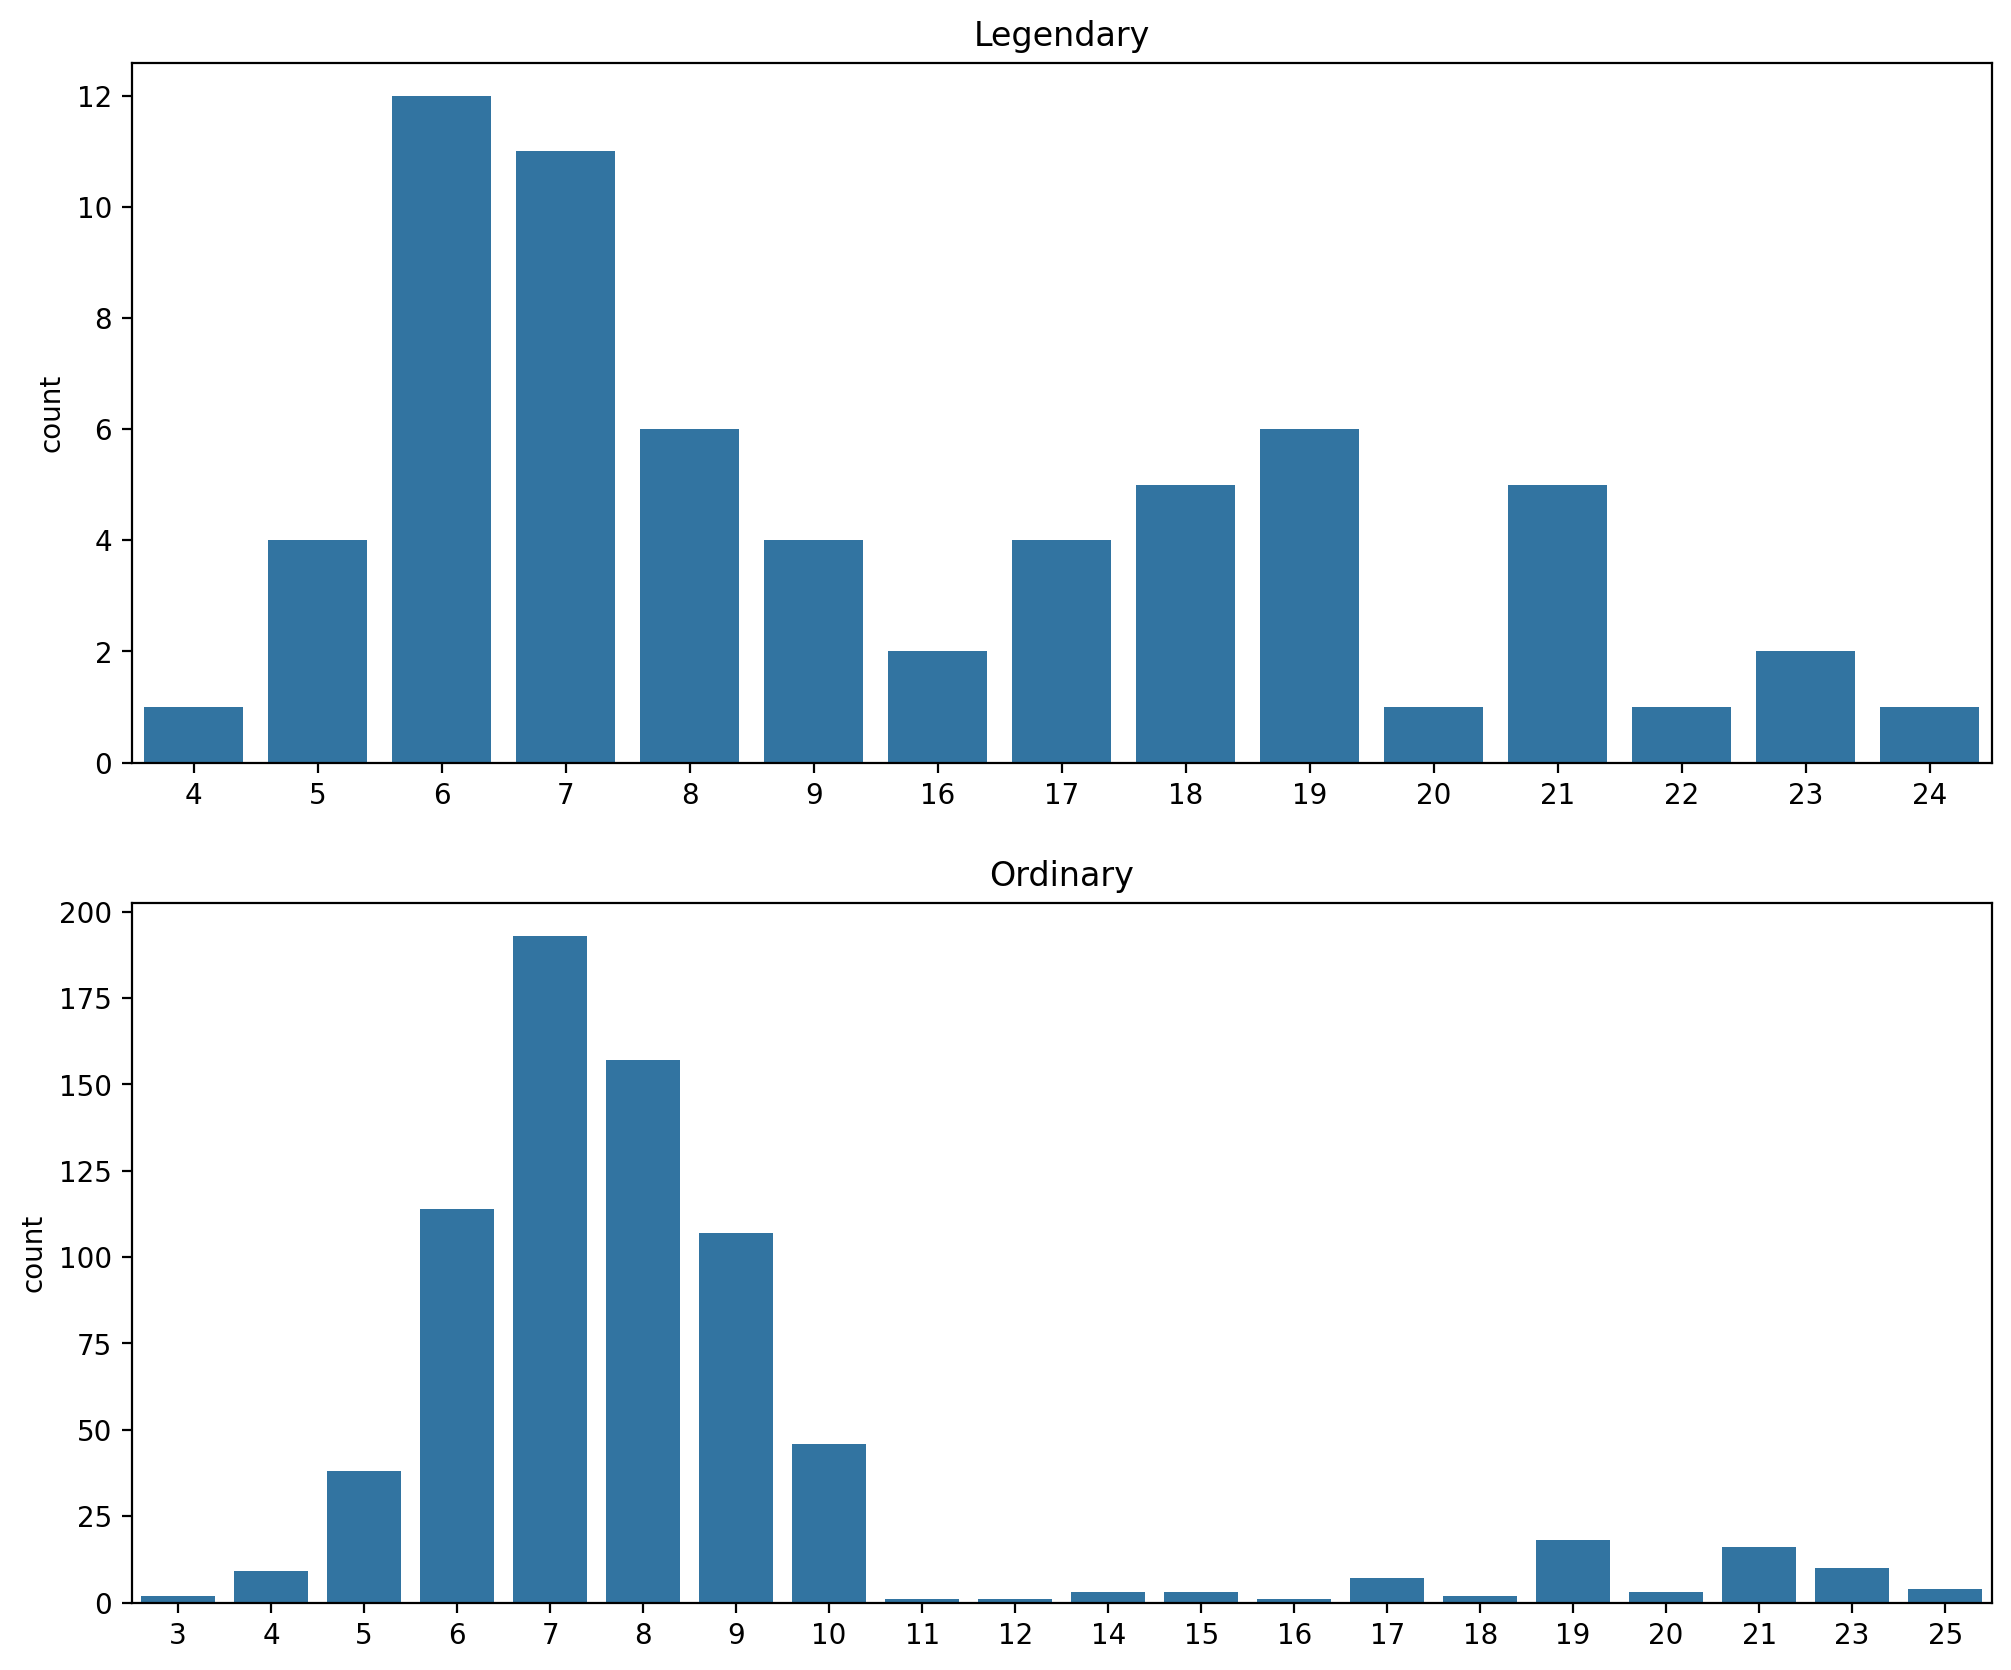

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ÏùÄ 16 Ïù¥ÏÉÅÏùò Í∏¥ Ïù¥Î¶ÑÏùÑ Í∞ÄÏßÑ Ìè¨ÏºìÎ™¨Ïù¥ ÎßéÏùÄ Î∞òÎ©¥, ÏùºÎ∞ò Ìè¨ÏºìÎ™¨ÏùÄ 10 Ïù¥ÏÉÅÏùò Í∏∏Ïù¥Î•º Í∞ÄÏßÄÎäî Ïù¥Î¶ÑÏùò ÎπàÎèÑÍ∞Ä ÏïÑÏ£º ÎÇÆÏäµÎãàÎã§.

In [ ]:
# Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïùò Ïù¥Î¶ÑÏù¥ 10 Ïù¥ÏÉÅÏùº ÌôïÎ•†
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [ ]:
# ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Ïùò Ïù¥Î¶ÑÏù¥ 10 Ïù¥ÏÉÅÏùº ÌôïÎ•†
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïùò Ïù¥Î¶ÑÏù¥ 10 Ïù¥ÏÉÅÏùº ÌôïÎ•†ÏùÄ 41% Î•º ÎÑòÎäî Î∞òÎ©¥Ïóê, ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Ïùò Ïù¥Î¶ÑÏù¥ 10 Ïù¥ÏÉÅÏùº ÌôïÎ•†ÏùÄ ÏïΩ 16% Î∞ñÏóê ÏïàÎê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§! <br/>
Ïù¥Îäî ÏïÑÏ£º ÌÅ∞ Ï∞®Ïù¥Ïù¥ÎØÄÎ°ú legendaryÏù∏ÏßÄ ÏïÑÎãåÏßÄÎ•º Íµ¨Î∂ÑÌïòÎäî Îç∞Ïóê ÌÅ∞ ÏùòÎØ∏Í∞Ä ÏûàÏäµÎãàÎã§. <br/>
<br/>
ÏúÑÏùò Îëê Í∞ÄÏßÄ, Ïù¥Î¶ÑÏóê ÎåÄÌïú Î∂ÑÏÑùÏùÄ Ï§ëÏöîÌïú ÏãúÏÇ¨Ï†êÏùÑ Í∞ÄÏßëÎãàÎã§.<br/>
<br/>
- ÎßåÏïΩ "Latios"Í∞Ä Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïù¥ÎùºÎ©¥, "%%% Latios" ÎòêÌïú Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïù¥Îã§!
- Ï†ÅÏñ¥ÎèÑ Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ÏóêÏÑú ÎÜíÏùÄ ÎπàÎèÑÎ•º Î≥¥Ïù¥Îäî Ïù¥Î¶ÑÎì§Ïùò Î™®ÏûÑÏù¥ Ï°¥Ïû¨ÌïúÎã§!
- Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ÏùÄ Í∏¥ Ïù¥Î¶ÑÏùÑ Í∞ÄÏ°åÏùÑ ÌôïÎ•†Ïù¥ ÎÜíÎã§!

ÏïûÏÑú ÌôïÏù∏Ìïú EDA Í≥ºÏ†ïÏóêÏÑú Ïù¥Î¶ÑÏùÄ Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïù∏ÏßÄ ÏïÑÎãåÏßÄÎ•º Í≤∞Ï†ïÌïòÎäî Ï§ëÏöîÌïú ÌäπÏßï Ï§ë ÌïòÎÇòÏòÄÏ£†.<br/>
Îî∞ÎùºÏÑú Ïù¥Î¶ÑÏóê Í¥ÄÌï¥ÏÑúÎäî Îëê Í∞ÄÏßÄÎ•º Ï§ëÏ†êÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.<br/>

1. Ïù¥Î¶ÑÏùò Í∏∏Ïù¥ : name_count Ïª¨ÎüºÏùÑ ÏÉùÏÑ± ÌõÑ Í∏∏Ïù¥Í∞Ä 10ÏùÑ ÎÑòÎäîÏßÄ ÏïÑÎãåÏßÄÏóê ÎåÄÌïú categorical Ïª¨ÎüºÏùÑ ÏÉùÏÑ±

2. ÌÜ†ÌÅ∞ Ï∂îÏ∂ú : legendary Ìè¨ÏºìÎ™¨ÏóêÏÑú ÎßéÏù¥ Îì±Ïû•ÌïòÎäî ÌÜ†ÌÅ∞ÏùÑ Ï∂îÎ†§ÎÇ¥Í≥† ÌÜ†ÌÅ∞ Ìè¨Ìï® Ïó¨Î∂ÄÎ•º Ïõê-Ìï´ Ïù∏ÏΩîÎî©(One-Hot Encoding)ÏúºÎ°ú Ï≤òÎ¶¨

In [ ]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê name_count ÏÉùÏÑ±
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       65       65     45           1      False           9  
1       80       80     60           1      False           7  
2      100      100     80           1      False           8  
3      122      120     80           1      False          21  
4       60       50     65           1      False          10

In [ ]:
# ÎÑ§ÏûÑ Í∏∏Ïù¥Ïàò 10Ïûê Ïù¥ÏÉÅÏù∏ Ìï≠Î™© long_name ÏÉùÏÑ±
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  
0       65       65     45           1      False           9      False  
1       80       80     60           1      False           7      False  
2      100      100     80           1      False           8      False  
3      122      120     80           1      False          21       True  
4       60       50     65           1      False          10       True

Îã§ÏùåÏúºÎ°ú Ìï† ÏùºÏùÄ Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ Ïù¥Î¶ÑÏóê Í∞ÄÏû• ÎßéÏù¥ Ïì∞Ïù¥Îäî ÌÜ†ÌÅ∞ÏùÑ ÏïåÏïÑÎ≥¥Í≥† Ïù¥Ïóê ÎåÄÌïú ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏùÑ ÎßåÎìúÎäî Í≤ÉÏûÖÎãàÎã§.<br/>
Ïù¥Î¶ÑÏóê Ïñ¥Îñ§ ÌÜ†ÌÅ∞Ïù¥ ÏûàÏúºÎ©¥ Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïùº ÌôïÎ•†Ïù¥ ÎÜíÏùÑÏßÄÎ•º Ï∞æÏïÑÎ≥¥Îäî Í≤ÉÏù¥Ï£†.<br/>
<br/>
ÌÜ†ÌÅ∞ÏùÑ Ï∂îÏ∂úÌïòÍ∏∞Ïóê ÏïûÏÑú, Ìè¨ÏºìÎ™¨Ïùò Ïù¥Î¶ÑÏóê ÎåÄÌï¥ Î®ºÏ†Ä ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§.<br/>
Ìè¨ÏºìÎ™¨Ïùò Ïù¥Î¶ÑÏùÄ Ï¥ù ÎÑ§ Í∞ÄÏßÄ ÌÉÄÏûÖÏúºÎ°ú ÎÇòÎâ©ÎãàÎã§.<br/>
<br/>
Ìïú Îã®Ïñ¥Î©¥ ex. Venusaur<br/>
Îëê Îã®Ïñ¥Ïù¥Í≥†, Ïïû Îã®Ïñ¥Îäî Îëê Í∞úÏùò ÎåÄÎ¨∏ÏûêÎ•º Í∞ÄÏßÄÎ©∞ ÎåÄÎ¨∏ÏûêÎ•º Í∏∞Ï§ÄÏúºÎ°ú Îëê Î∂ÄÎ∂ÑÏúºÎ°ú ÎÇòÎâòÎäî Í≤ΩÏö∞ ex. VenusaurMega Venusaur<br/>
Ïù¥Î¶ÑÏùÄ Îëê Îã®Ïñ¥Ïù¥Í≥†, Îß® Îí§Ïóê X, YÎ°ú ÏÑ±Î≥ÑÏùÑ ÌëúÏãúÌïòÎäî Í≤ΩÏö∞ ex. CharizardMega Charizard X<br/>
ÏïåÌååÎ≤≥Ïù¥ ÏïÑÎãå Î¨∏ÏûêÎ•º Ìè¨Ìï®ÌïòÎäî Í≤ΩÏö∞ ex. Zygarde50% Forme<br/>
<br/>
Ïù¥Î¶ÑÏóê ÏïåÌååÎ≤≥Ïù¥ ÏïÑÎãå Î¨∏ÏûêÍ∞Ä Îì§Ïñ¥Í∞Ñ Í≤ΩÏö∞ Ï†ÑÏ≤òÎ¶¨ÌïòÍ∏∞<br/>
Ïù¥ Ï§ë Í∞ÄÏû• Î®ºÏ†Ä 'ÏïåÌååÎ≤≥Ïù¥ ÏïÑÎãå Î¨∏Ïûê'Î•º Ìè¨Ìï®ÌïòÎäî Í≤ΩÏö∞Î•º Ï≤òÎ¶¨ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.<br/>
Ïñ¥Îñ§ Î¨∏ÏûêÏó¥Ïù¥ ÏïåÌååÎ≤≥ÏúºÎ°úÎßå Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ≥† Ïã∂ÏùÑ ÎïåÎäî isalpha() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Ìé∏Î¶¨Ìï©ÎãàÎã§.<br/>
Ïö∞Î¶¨Îäî ÏïåÌååÎ≤≥Ïù¥ ÏïÑÎãå Î¨∏ÏûêÎ•º Ìè¨Ìï®ÌïòÎäî Ïù¥Î¶ÑÏùÑ Í±∏Îü¨ÎÇ¥Í≥† Ïã∂ÏùÄÎç∞, Ï£ºÏùòÌï† Ï†êÏùÄ Ïù¥Î¶ÑÏóê ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞ÏóêÎèÑ isalpha() = FalseÎ°ú Ï≤òÎ¶¨ÎêúÎã§Îäî Ï†êÏûÖÎãàÎã§.<br/>
Îî∞ÎùºÏÑú ÏïåÌååÎ≤≥ Ï≤¥ÌÅ¨Î•º ÏúÑÌï¥ ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä ÏóÜÎäî Ïª¨ÎüºÏùÑ Îî∞Î°ú ÎßåÎì§Ïñ¥Ï§Ä ÌõÑ, ÎùÑÏñ¥Ïì∞Í∏∞Î•º ÎπàÏπ∏ÏúºÎ°ú Ï≤òÎ¶¨Ìï¥ÏÑú ÌôïÏù∏ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

#                 Name   Type 1 Type 2  Total  HP  Attack  Defense  \
795  719              Diancie     Rock  Fairy    600  50     100      150   
796  719  DiancieMega Diancie     Rock  Fairy    700  50     160      110   
797  720  HoopaHoopa Confined  Psychic  Ghost    600  80     110       60   
798  720   HoopaHoopa Unbound  Psychic   Dark    680  80     160       60   
799  721            Volcanion     Fire  Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
795      100      150     50           6       True           7      False   
796      160      110    110           6       True          19       True   
797      150      130     70           6       True          19       True   
798      170      130     80           6       True          18       True   
799      130       90     70           6       True           9      False   

           Name_nospace  
795             Diancie  
796  DiancieMegaDiancie  
797  HoopaHoopaConfined  
798   HoopaHoopaUnbound  
799           Volcanion

In [ ]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
0       65       65     45           1      False           9      False   
1       80       80     60           1      False           7      False   
2      100      100     80           1      False           8      False   
3      122      120     80           1      False          21       True   
4       60       50     65           1      False          10       True   

           Name_nospace  name_isalpha  
0             Bulbasaur          True  
1               Ivysaur          True  
2              Venusaur          True  
3  VenusaurMegaVenusaur          True  
4            Charmander          True

In [ ]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


#              Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29          Nidoran‚ôÄ   Poison     NaN    275   55      47       52   
37    32          Nidoran‚ôÇ   Poison     NaN    273   46      57       40   
90    83        Farfetch'd   Normal  Flying    352   52      65       55   
131  122          Mr. Mime  Psychic   Fairy    460   40      45       65   
252  233          Porygon2   Normal     NaN    515   85      80       90   
270  250             Ho-oh     Fire  Flying    680  106     130       90   
487  439          Mime Jr.  Psychic   Fairy    310   20      25       45   
525  474         Porygon-Z   Normal     NaN    535   85      80       70   
794  718  Zygarde50% Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
34        40       40     41           1      False           8      False   
37        40       40     50           1      False           8      False   
90        58       62     60           1      False          10       True   
131      100      120     90           1      False           8      False   
252      105       95     60           2      False           8      False   
270      110      154     90           2       True           5      False   
487       70       90     60           4      False           8      False   
525      135       75     90           4      False           9      False   
794       81       95     95           6       True          16       True   

        Name_nospace  name_isalpha  
34          Nidoran‚ôÄ         False  
37          Nidoran‚ôÇ         False  
90        Farfetch'd         False  
131          Mr.Mime         False  
252         Porygon2         False  
270            Ho-oh         False  
487          MimeJr.         False  
525        Porygon-Z         False  
794  Zygarde50%Forme         False

In [ ]:
pokemon = pokemon.replace(to_replace="Nidoran‚ôÄ", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran‚ôÇ", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

#           Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29      Nidoran X   Poison     NaN    275   55      47       52   
37    32      Nidoran Y   Poison     NaN    273   46      57       40   
90    83      Farfetchd   Normal  Flying    352   52      65       55   
131  122        Mr Mime  Psychic   Fairy    460   40      45       65   
252  233    Porygon Two   Normal     NaN    515   85      80       90   
270  250          Ho Oh     Fire  Flying    680  106     130       90   
487  439        Mime Jr  Psychic   Fairy    310   20      25       45   
525  474      Porygon Z   Normal     NaN    535   85      80       70   
794  718  Zygarde Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
34        40       40     41           1      False           8      False   
37        40       40     50           1      False           8      False   
90        58       62     60           1      False          10       True   
131      100      120     90           1      False           8      False   
252      105       95     60           2      False           8      False   
270      110      154     90           2       True           5      False   
487       70       90     60           4      False           8      False   
525      135       75     90           4      False           9      False   
794       81       95     95           6       True          16       True   

        Name_nospace  name_isalpha  
34         Nidoran X         False  
37         Nidoran Y         False  
90         Farfetchd         False  
131          Mr.Mime         False  
252      Porygon Two         False  
270            Ho Oh         False  
487          MimeJr.         False  
525        Porygon Z         False  
794  Zygarde50%Forme         False

In [ ]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary, name_count, long_name, Name_nospace, name_isalpha]
Index: []

Ïù¥Î¶ÑÏùÑ ÎùÑÏñ¥Ïì∞Í∏∞ & ÎåÄÎ¨∏Ïûê Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ¶¨Ìï¥ ÌÜ†ÌÅ∞ÌôîÌïòÍ∏∞<br/>
Í∑∏Îü¨Î©¥ Ïù¥Ï†ú Î™®Îì† Ïù¥Î¶ÑÏùÄ ÏÑ∏ Í∞ÄÏßÄ ÌÉÄÏûÖÏúºÎ°ú ÎÇòÎâòÎØÄÎ°ú ÌÜ†ÌÅ∞Ìôî(tokenizing)Ìï† Ïàò ÏûàÏäµÎãàÎã§.<br/>
Ïù¥Î¶ÑÏóê ÏûàÎäî ÌÜ†ÌÅ∞ÏùÑ Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥Î¶ÑÏùÑ ÌÜ†ÌÅ∞Ìôî (Î™®Îì† ÌÜ†ÌÅ∞ÏúºÎ°ú Î∂ÑÎ¶¨) Ìï† Ïàò ÏûàÎäî Ìï®ÏàòÎ•º ÏÉùÏÑ±Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.<br/>
<br/>
Î¨∏ÏûêÏó¥ÏùÑ Ï≤òÎ¶¨Ìï† ÎïåÎäî Ï£ºÎ°ú Ï†ïÍ∑úÌëúÌòÑÏãù(RegEx: Regular Expression) Ïù¥ÎùºÎäî Í∏∞Î≤ïÏù¥ ÏÇ¨Ïö©Îê©ÎãàÎã§.<br/>
Ï†ïÍ∑úÌëúÌòÑÏãùÏù¥ÎûÄ Î¨∏ÏûêÏó¥ÏùÑ Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùò ÌïòÎÇòÎ°ú, ÌäπÏ†ïÌïú Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Î¨∏ÏûêÎ•º Í≤ÄÏÉâÌïòÍ±∞ÎÇò ÏπòÌôòÌïòÎäî Îì±Ïùò ÏûëÏóÖÏùÑ ÌïòÍ≥† Ïã∂ÏùÑ Îïå Í∞ÑÌé∏ÌïòÍ≤å Ï≤òÎ¶¨Ìï† Ïàò ÏûàÍ≤å Ìï¥Ï£ºÎäî ÎèÑÍµ¨ÏûÖÎãàÎã§.<br/>
<br/>
Ï†ïÍ∑úÌëúÌòÑÏãùÏùÄ Î¨∏ÏûêÏó¥ÏùÑ Îã§Î£∞ Îïå ÏïÑÏ£º Ïú†Ïö©Ìïú ÎèÑÍµ¨ÏßÄÎßå, ÏÇ¨Ïã§ ÍπäÍ≤å Îì§Ïñ¥Í∞ÄÎ©¥ ÏïÑÏ£º Î≥µÏû°ÌïòÍ≥† Ïñ¥Î†µÏäµÎãàÎã§.<br/>
Îî∞ÎùºÏÑú Ïò§ÎäòÏùÄ ÎßõÎ≥¥Í∏∞ÏôÄ Í∞ôÏùÄ ÌòïÌÉúÎ°ú ÏΩîÎìúÎ•º Î∞õÏïÑÎì§Ïù¥Î©¥ÏÑú ÏßÑÌñâÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
import re

In [ ]:
def tokenize(name):
    tokens = []
    name_split = name.split(" ")
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)

In [ ]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [ ]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [ ]:
from collections import Counter

In [ ]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

# 5. Ïù∏ÏΩîÎî©

In [ ]:
for token, _ in most_common:
    # pokemon[token] = ... ÌòïÏãùÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎ©¥ Îí§ÏóêÏÑú warningÏù¥ Î∞úÏÉùÌï©ÎãàÎã§
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  ...  Forme   Mega  Mewtwo  Kyurem  Deoxys  Hoopa  Latias  \
0       65       65  ...  False  False   False   False   False  False   False   
1       80       80  ...  False  False   False   False   False  False   False   
2      100      100  ...  False  False   False   False   False  False   False   
3      122      120  ...  False   True   False   False   False  False   False   
4       60       50  ...  False  False   False   False   False  False   False   
5       80       65  ...  False  False   False   False   False  False   False   
6      109       85  ...  False  False   False   False   False  False   False   
7      130       85  ...  False   True   False   False   False  False   False   
8      159      115  ...  False   True   False   False   False  False   False   
9       50       64  ...  False  False   False   False   False  False   False   

   Latios  Kyogre  Groudon  
0   False   False    False  
1   False   False    False  
2   False   False    False  
3   False   False    False  
4   False   False    False  
5   False   False    False  
6   False   False    False  
7   False   False    False  
8   False   False    False  
9   False   False    False  

[10 rows x 27 columns]

In [ ]:
print(types)

['Psychic', 'Dragon', 'Fire', 'Ice', 'Ghost', 'Poison', 'Bug', 'Grass', 'Normal', 'Rock', 'Dark', 'Electric', 'Fighting', 'Fairy', 'Steel', 'Flying', 'Water', 'Ground']


In [ ]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

Type 1  Type 2  Psychic  Dragon   Fire    Ice  Ghost  Poison    Bug  Grass  \
0  Grass  Poison    False   False  False  False  False    True  False   True   
1  Grass  Poison    False   False  False  False  False    True  False   True   
2  Grass  Poison    False   False  False  False  False    True  False   True   
3  Grass  Poison    False   False  False  False  False    True  False   True   
4   Fire     NaN    False   False   True  False  False   False  False  False   

   Normal   Rock   Dark  Electric  Fighting  Fairy  Steel  Flying  Water  \
0   False  False  False     False     False  False  False   False  False   
1   False  False  False     False     False  False  False   False  False   
2   False  False  False     False     False  False  False   False  False   
3   False  False  False     False     False  False  False   False  False   
4   False  False  False     False     False  False  False   False  False   

   Ground  
0   False  
1   False  
2   False  
3   False  
4   False

In [ ]:
print(original_data.shape)
original_data.head()

(800, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [ ]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [ ]:
target = 'Legendary'

In [ ]:
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0    318  45      49       49       65       65     45           1
1    405  60      62       63       80       80     60           1
2    525  80      82       83      100      100     80           1
3    625  80     100      123      122      120     80           1
4    309  39      52       43       60       50     65           1

In [ ]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
print('Ïäù=3')

Ïäù=3


In [ ]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Ïäù=3')

Ïäù=3


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [ ]:
len(legendary)

65

Ï†ÑÏ≤¥Îç∞Ïù¥ÌÑ∞ 800 Ï§ë 65Îßå Ï†ÑÏÑ§ Ìè¨ÏºìÎ™¨ÏúºÎ°ú ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞Îäî Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ <br/>
accuracy Î≥¥Îã§Îäî Îã§Î•∏ ÏßÄÌëúÎ°ú ÌôïÏù∏Ïù¥ ÌïÑÏöî

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



recalldl 62%Î°ú ÎÇÆÏïÑÎ≥¥ÏûÑ

# 6. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÌÜµÌïú ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò(Ï†ÑÏÑ§) Í¥ÄÍ≥Ñ ÏÑ§Î™Ö

In [ ]:
# 1. stats model Ïùò GLM ÏùÑ ÌÜµÌïú ÌèâÍ∞ÄÎ•º ÏúÑÌï¥ bool ÌÉÄÏûÖÏùò Îç∞Ïù¥ÌÑ∞Î•º 0, 1 Ïùò Ï†ïÏàòÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò
bool_columns = ['long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

X[bool_columns] = X[bool_columns].astype(int)
X.head()

<ipython-input-91-a7d073e19df4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[bool_columns] = X[bool_columns].astype(int)


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0    318  45      49       49       65       65     45           1   
1    405  60      62       63       80       80     60           1   
2    525  80      82       83      100      100     80           1   
3    625  80     100      123      122      120     80           1   
4    309  39      52       43       60       50     65           1   

   name_count  long_name  ...  Dark  Fairy  Steel  Ghost  Psychic  Ice  Bug  \
0           9          0  ...     0      0      0      0        0    0    0   
1           7          0  ...     0      0      0      0        0    0    0   
2           8          0  ...     0      0      0      0        0    0    0   
3          21          1  ...     0      0      0      0        0    0    0   
4          10          1  ...     0      0      0      0        0    0    0   

   Grass  Dragon  Fighting  
0      1       0         0  
1      1       0         0  
2      1       0         0  
3      1       0         0  
4      0       0         0  

[5 rows x 38 columns]

In [ ]:
import statsmodels.api as sm

# 2. target Îç∞Ïù¥ÌÑ∞ ÎòêÌïú 0, 1 Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò
y_numbers = [1 if yi == True else 0 for yi in y]

# 3. statsmodels Ïùò GLM Ìï®ÏàòÎ•º ÌÜµÌï¥ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Í≤∞Í≥º Î≥¥Í≥†ÏÑú Ï∂úÎ†•
logit_reg_sm = sm.GLM(y_numbers, X.assign(const=1),
                      family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  800
Model:                            GLM   Df Residuals:                      762
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.142
Date:                Mon, 19 Feb 2024   Deviance:                       26.285
Time:                        06:22:36   Pearson chi2:                     68.3
No. Iterations:                    25   Pseudo R-squ. (CS):             0.4118
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Total          0.1855      0.061      3.063      0.0

Ìï¥ÏÑù
1. Total, const Î•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî pÍ∞íÏù¥ Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÎÜíÍ≤å ÎÇòÏôîÎäîÎç∞, Ïù¥Îäî Îëê Î≥ÄÏàòÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùåÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.


2. Total Ïùò ÌöåÍ∑ÄÍ≥ÑÏàò(0.1855)Ïùò Í≤ΩÏö∞, Total Í∞íÏù¥ 1 Îã®ÏúÑ Ï¶ùÍ∞ÄÌï† Îïå Ìè¨ÏºìÎ™¨Ïù¥ Ï†ÑÏÑ§Ïùº ÌôïÎ•†Ïù¥ Í∑∏Î†áÏßÄ ÏïäÏùÑ ÌôïÎ•†Î≥¥Îã§ ÌèâÍ∑†Ï†ÅÏúºÎ°ú 1.2Î∞∞ ÎÜíÏùåÏùÑ ÏùòÎØ∏ÌïúÎã§(Ïò§Ï¶àÎπÑ Ìï¥ÏÑù).


3. Í≤∞Í≥ºÏ†ÅÏúºÎ°ú ÏÑ†Ìòï Î™®Îç∏Î°ú Ìè¨ÏºìÎ™¨Ïù¥ Ï†ÑÏÑ§Ïùº ÌôïÎ•†ÏùÑ ÏÑ§Î™ÖÌïòÎäî Í≤ÉÏùÄ Total Î≥ÄÏàò Ïô∏ Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú ÎπÑÏÑ†Ìòï Î™®Îç∏ÏùÑ ÌÜµÌïú ÏòàÏ∏° ÌÖåÏä§ÌÅ¨Î•º ÏàòÌñâÌïòÎäî Í≤ÉÏù¥ Ï†ÅÏ†àÌïòÎã§Í≥† Í≤∞Î°†ÏùÑ ÎÇ¥Î¶∞Îã§.

In [ ]:
np.exp(0.1855)

1.2038201997751343

# 7. Î®∏Ïã†Îü¨Îãù

### 7.1 ÏùòÏÇ¨Í≤∞Ï†ïÌä∏Î¶¨(ÌîºÏ≥ê ÏóîÏßÄÎãàÏñ¥ÎßÅ Ï†ÅÏö©)

In [ ]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Psychic', 'Dragon', 'Fire', 'Ice', 'Ghost', 'Poison', 'Bug', 'Grass',
       'Normal', 'Rock', 'Dark', 'Electric', 'Fighting', 'Fairy', 'Steel',
       'Flying', 'Water', 'Ground'],
      dtype='object')


In [ ]:
# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÌïÑÌÑ∞
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [ ]:
target = "Legendary"
target

'Legendary'

In [ ]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0    318  45      49       49       65       65     45           1   
1    405  60      62       63       80       80     60           1   
2    525  80      82       83      100      100     80           1   
3    625  80     100      123      122      120     80           1   
4    309  39      52       43       60       50     65           1   

   name_count  long_name  ...   Dark  Fairy  Steel  Ghost  Psychic    Ice  \
0           9      False  ...  False  False  False  False    False  False   
1           7      False  ...  False  False  False  False    False  False   
2           8      False  ...  False  False  False  False    False  False   
3          21       True  ...  False  False  False  False    False  False   
4          10       True  ...  False  False  False  False    False  False   

     Bug  Grass  Dragon  Fighting  
0  False   True   False     False  
1  False   True   False     False  
2  False   True   False     False  
3  False   True   False     False  
4  False  False   False     False  

[5 rows x 38 columns]

In [ ]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [ ]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



### 7.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model

RandomForestClassifier(random_state=0)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[132,   6],
       [  7,  15]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.96      0.95       138
        True       0.71      0.68      0.70        22

    accuracy                           0.92       160
   macro avg       0.83      0.82      0.83       160
weighted avg       0.92      0.92      0.92       160



### Random Forest - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

- **n_estimators** (Í∏∞Î≥∏Í∞í 100) : Ìä∏Î¶¨Ïùò Ïàò
- criterion (Í∏∞Î≥∏Í∞í gini) : Î∂àÏàúÎèÑ ÏßÄÌëú
- **max_depth** (Í∏∞Î≥∏Í∞í None) : ÏµúÎåÄ ÌïúÎèÑ ÍπäÏù¥
- min_samples_split (Í∏∞Î≥∏Í∞í 2) : ÏûêÏãù ÎÖ∏ÎìúÎ•º Í∞ñÍ∏∞ ÏúÑÌïú ÏµúÏÜåÌïúÏùò Îç∞Ïù¥ÌÑ∞ Ïàò
- min_samples_leaf (Í∏∞Î≥∏Í∞í 1) : Î¶¨ÌîÑ ÎÖ∏ÎìúÍ∞Ä ÎêòÍ∏∞ ÏúÑÌïú ÏµúÏÜå ÏÉòÌîå Ïàò

In [ ]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100, 200],
        'max_depth':[3, 5, 7],
        'min_samples_split':[2, 3, 5],
        'min_samples_leaf':[1, 2, 3]
        }

model = RandomForestClassifier(random_state=0)
grid = GridSearchCV(model, params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200]})

In [ ]:
grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
model = RandomForestClassifier(
    n_estimators = 200,
    max_depth = 7,
    min_samples_split = 5,
    min_samples_leaf = 2
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[132   6]
 [  5  17]]
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       138
        True       0.74      0.77      0.76        22

    accuracy                           0.93       160
   macro avg       0.85      0.86      0.86       160
weighted avg       0.93      0.93      0.93       160



### 7.3 XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[132,   6],
       [  3,  19]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.96      0.97       138
        True       0.76      0.86      0.81        22

    accuracy                           0.94       160
   macro avg       0.87      0.91      0.89       160
weighted avg       0.95      0.94      0.95       160



### XGBoost - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

- booster (Í∏∞Î≥∏Í∞í gbtree) : Î∂ÄÏä§ÌåÖ ÏïåÍ≥†Î¶¨Ï¶ò (ÎòêÎäî dart, gblinear)
- objective (Í∏∞Î≥∏Í∞í binary:logistic) : Ïù¥ÏßÑÎ∂ÑÎ•ò (Îã§Ï§ëÎ∂ÑÎ•ò: multi:softmax)
- max_depth (Í∏∞Î≥∏Í∞í 6) : ÏµúÎåÄ ÌïúÎèÑ ÍπäÏù¥
- **learning_rate** (Í∏∞Î≥∏Í∞í1) : ÌïôÏäµÎ•†
    - Í∞íÏù¥ ÌÅ¨Î©¥ ÏûêÏπ´ Í∏∞Ïö∏Í∏∞Í∞Ä 0Ïù∏ ÏßÄÏ†êÏùÑ Ï∞æÏßÄ Î™ªÌïòÍ≤å Îê† Ïàò ÏûàÍ≥†,
    Í∞íÏù¥ ÏûëÏúºÎ©¥ ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ ÎßéÏù¥ ÏÜåÏöîÎê®
    - Ï†ÅÏ†àÌïòÍ≤å Ï°∞Ï†àÌï¥Ï£ºÎäî Í≤ÉÏù¥ Ï¢ãÏùå
- **n_estimators** (Í∏∞Î≥∏Í∞í 100) : Ìä∏Î¶¨Ïùò Ïàò
    - learning rate Í∞íÏùÑ ÏûëÍ≤å ÏÑ§Ï†ïÌñàÎã§Î©¥ n_estimatorsÏùò Í∞íÏùÄ ÌÅ¨Í≤å ÏÑ§Ï†ïÌï¥Ïïº Ìï®
    - Îëê Í∞íÏù¥ Î™®Îëê ÏûëÎã§Î©¥ Í∏∞Ïö∏Í∏∞Í∞Ä 0Ïù¥ ÎêòÎäî ÏßÄÏ†êÏùÑ Ï∞æÍ∏∞ÎèÑ Ï†ÑÏóê ÌïôÏäµÏù¥ Ï¢ÖÎ£åÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå
- subsample (Í∏∞Î≥∏Í∞í 1) : ÌõàÎ†® ÏÉòÌîå Í∞úÏàòÏùò ÎπÑÏú®
- colsample_bytree (Í∏∞Î≥∏Í∞í 1) : ÌäπÏÑ±(ÌîºÏ≥ê) Í∞úÏàòÏùò ÎπÑÏú®
- n_jobs (Í∏∞Î≥∏Í∞í 1) : ÏÇ¨Ïö© ÏΩîÏñ¥ (cpu) Ïàò (-1: Î™®Îì† ÏΩîÏñ¥Î•º Îã§ ÏÇ¨Ïö©)

In [ ]:
from sklearn.model_selection import GridSearchCV

params={'learning_rate':[0.07, 0.05],
        'max_depth':[3, 5, 7],
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

xgb = XGBClassifier()
grid = GridSearchCV(xgb, params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [ ]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}

In [ ]:
xgb = XGBClassifier(
    learning_rate = 0.05,
    max_depth = 5,
    n_estimators = 100,
    subsample = 0.9
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[132   6]
 [  1  21]]
              precision    recall  f1-score   support

       False       0.99      0.96      0.97       138
        True       0.78      0.95      0.86        22

    accuracy                           0.96       160
   macro avg       0.89      0.96      0.92       160
weighted avg       0.96      0.96      0.96       160



# ÌöåÍ≥†

**Î∞ïÍ∑úÎ¶¨**  
Î∂ÑÏÑù Î™©Ï†ÅÏùÑ ÏûêÏú†Î°≠Í≤å Ï†ïÌï† Ïàò ÏûàÎäî Îç∞Ïù¥ÌÑ∞Îäî Ï≤òÏùåÏù¥Îùº Ïã†ÏÑ†ÌñàÏäµÎãàÎã§.  
Îã§Î•∏ ÌÉÄÍ≤ü Î∂ÑÏÑùÎèÑ ÏßÑÌñâÌï¥ Î≥¥Í≥† Ïã∂ÏóàÎäîÎç∞ ÏãúÍ∞ÑÏù¥ Î∂ÄÏ°±Ìï† ÎìØ Ìï¥ÏÑú ÏãúÎèÑÌï¥Î≥¥ÏßÄ Î™ªÌïú Í≤å ÏïÑÏâ¨ÏõåÏöî. Í∞úÏù∏Ï†ÅÏúºÎ°ú ÏãúÎèÑÌï¥Î¥êÏïº Ìï† Í≤É Í∞ôÏäµÎãàÎã§.  
ÎßàÏßÄÎßâÏóê Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÎßÅ ÏΩîÎìú Î∂ôÏó¨ÎÑ£ÏùÑ Îïå ÏïÑÎ¨¥ÏÉùÍ∞Å ÏóÜÏù¥ ÏòàÏ†Ñ ÏΩîÎìú Î∂ôÏó¨ ÎÑ£ÏóàÎã§Í∞Ä Í≤∞Í≥ºÍ∞Ä Ïù¥ÏÉÅÌïòÍ≤å ÎÇòÏò§Îäî ÏÇ¨Îã®Ïù¥ ÎÇ¨ÎäîÎç∞ Ïó≠Ïãú ÏΩîÎìú Ïû¨ÌôúÏö©ÎèÑ Îã§ÏãúÎ¥êÏïº ÌïòÎäî Í≤É Í∞ôÏäµÎãàÎã§.  
Í∑∏ÎûòÎèÑ Îã§Î•∏ Î∂ÑÎì§Ïù¥ ÏΩîÎìú ÌãÄÎ¶∞ Í≤ÉÎèÑ Ïûò Ï∞æÏïÑÏ£ºÏÖîÏÑú Îçú Ìó§Îß§Í≥† Í∏àÎ∞© Ìï¥Í≤∞Ìï¥ÏÑú Îã§ÌñâÏù¥ÏóàÏäµÎãàÎã§ü§£  
ÏΩîÎû© ÏÇ¨Ïö©ÏùÄ ÏïÑÏßÅÎèÑ Ï°∞Í∏à Ïñ¥ÏÉâÌï©ÎãàÎã§...Í≥ÑÏÜç ÌòëÏóÖÌïòÎã§Î≥¥Î©¥ ÏùµÏàôÌï¥ÏßÄÍ≤†Ï£†?

**ÍπÄÎèÑÌòÑ**

: Ï£ºÏñ¥ÏßÑ Í≥ºÏ†úÏóêÏÑú Î°úÏßÄÏä§Ìã± Î™®Îç∏ÏùÑ ÌÜµÌï¥ ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò(Ìè¨ÏºìÎ™¨Ïù¥ Ï†ÑÏÑ§Ïù∏ Í≤ΩÏö∞)ÏùÑ ÏÑ§Î™ÖÌïòÎäî ÏãúÎèÑÎ•º ÌÜµÌï¥ ÏÑ†ÌòïÎ™®Îç∏Ïùò ÏÑ§Î™ÖÎ†•Î≥¥Îã§ ÎπÑÏÑ†ÌòïÎ™®Îç∏Ïùò ÏòàÏ∏° ÌÖåÏä§ÌÅ¨Î•º ÏàòÌñâÌï¥Ïïº ÌïòÎäî Í∑ºÍ±∞Î•º Ï∞æÏùÑ Ïàò ÏûàÏóàÎã§. ÏïôÏÉÅÎ∏î Î™®Îç∏Ïóê gridsearch Î∞©Î≤ïÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏Ìä∏Î•º ÌÉêÏÉâÌïòÏòÄÍ≥† ÏòàÏ∏°ÏÑ±Îä•(recall) 92 ÏóêÏÑú 95 Î°ú Ìñ•ÏÉÅÏãúÌÇ§Îäî Í≤∞Í≥ºÎ•º ÏñªÏóàÎã§. Îã§ÏñëÌïú Í¥ÄÏ†êÍ≥º Î∞©Î≤ïÎ°†ÏùÑ Ï†ÅÏö©ÌïòÎ©¥ÏÑú ÏßÄÍ∏àÍπåÏßÄ Î∞∞Ïö¥ ÎÇ¥Ïö©Îì§Ïù¥ Ï†ïÎ¶¨ÎêòÍ≥† Ïù¥Ìï¥Í∞Ä Î∂ÄÏ°±ÌñàÎçò Î∂ÄÎ∂ÑÎèÑ ÏßÑÎã®Ìï† Ïàò ÏûàÏóàÎã§.

**ÏñëÎèôÏòÅ**

Ìè¨ÏºìÎ™¨Ïù¥ÎùºÎäî ÏπúÏàôÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÏßÑÌñâÌïòÎã§Î≥¥Îãà Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨Ìï† Îïå ÎèÑÎ©îÏù∏ ÏßÄÏãùÏùò Ï§ëÏöî
ÏÑ±Ïóê ÎåÄÌï¥ ÎäêÎÇÑ Ïàò ÏûàÏóàÏäµÎãàÎã§.
Ïù¥Î¶Ñ Í∏∏Ïù¥Í∞ôÏù¥ ÏÉàÎ°úÏö¥ Î∞©Î≤ïÏúºÎ°úÎèÑ ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÑ ÏßÑÌñâÌñàÏùÑ Îïå Ï¢ãÏùÄ Í≤∞Í≥ºÍ∞Ä ÎÇòÏôÄ Îçî Îã§ÏñëÌïú ÏãúÏïºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï†ëÍ∑ºÌïòÎäî Í≤ÉÏù¥ ÌïÑÏöîÌïòÎã§Îäî Í≤ÉÏùÑ Î∞∞Ïõ†ÏäµÎãàÎã§.
Í∞úÏù∏Ïù¥ ÏïÑÎãå ÌåÄ ÌîÑÎ°úÏ†ùÌä∏ Ïãú ÏóÖÎ¨¥ÏôÄ ÏãúÍ∞Ñ Î∞∞Î∂ÑÏùÄ Îß§Î≤à ÏïÑÏâΩÏßÄÎßå ÏÑúÎ°ú Ï†êÏ†ê ÏùµÏàôÌï¥ÏßÄÎ©∞ Îçî ÎÇòÏùÄ Í≤∞Í≥ºÎ¨ºÎì§Ïù¥ ÎßåÎì§Ïñ¥ÏßÄÍ≥† ÏûàÎäî Í≤É Í∞ôÏäµÎãàÎã§
